In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from joblib import dump
import warnings
warnings.filterwarnings("ignore")

# New section

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data_2 2.csv to bank_transactions_data_2 2.csv


In [3]:
# Load the dataset
df = pd.read_csv('bank_transactions_data_2 2.csv')

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())

Shape of the dataset: (2512, 16)


TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [4]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acc

In [5]:
# For numerical statistics
numerical_stats = df.describe()

styled_stats = numerical_stats.style.background_gradient(cmap='YlOrBr')
display(styled_stats)

In [6]:
import matplotlib.cm as cm
from IPython.display import display

# Get categorical statistics
categorical_stats = df.describe(include='object').T

# Use a better background color (modern electric blue)
background_color = '#1E90FF'  # vibrant and professional

# Style the DataFrame
categorical_stats = categorical_stats.style.set_properties(**{'background-color': background_color,
                                                              'color': 'white',  # makes text readable
                                                              'font-weight': 'bold'})

# Display the styled DataFrame
display(categorical_stats)


In [7]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [8]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


In [9]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [10]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: TransactionID
Unique Values: ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']

Column: AccountID
Unique Values: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC

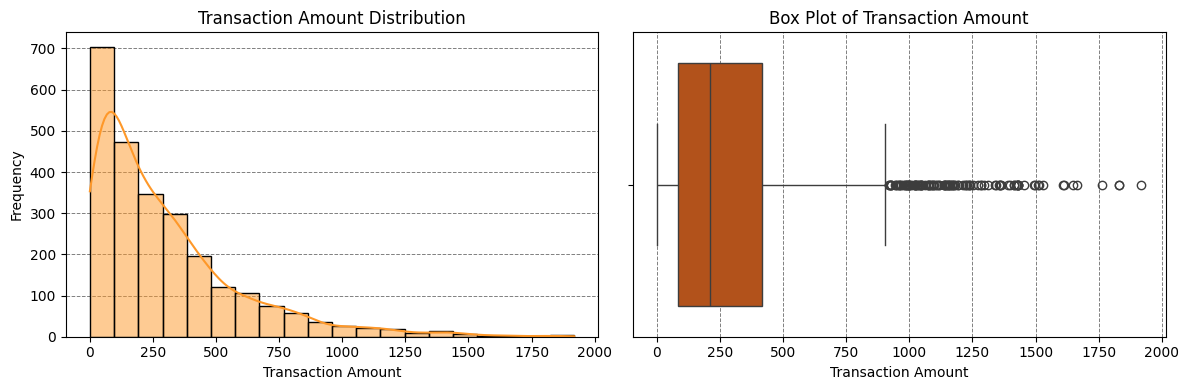


Summary Statistics for Transaction Amount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [11]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['TransactionAmount'].describe())

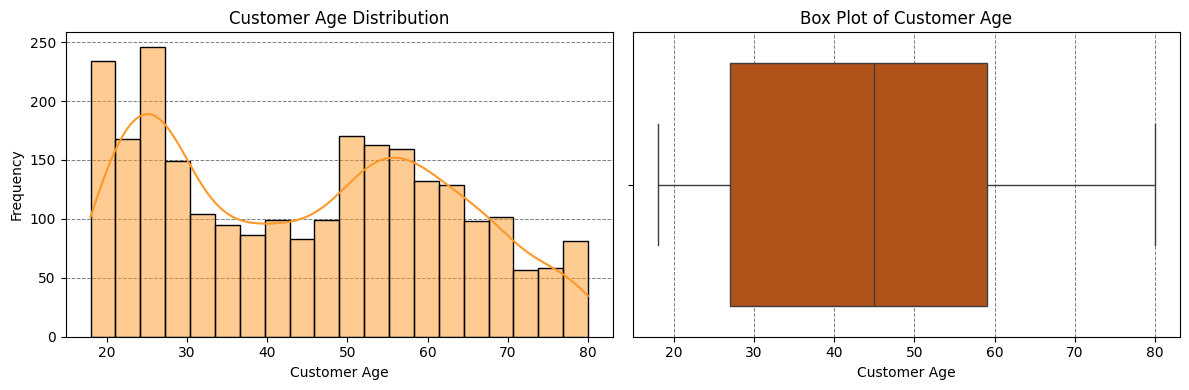


Summary Statistics for Customer Age:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [12]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['CustomerAge'].describe())

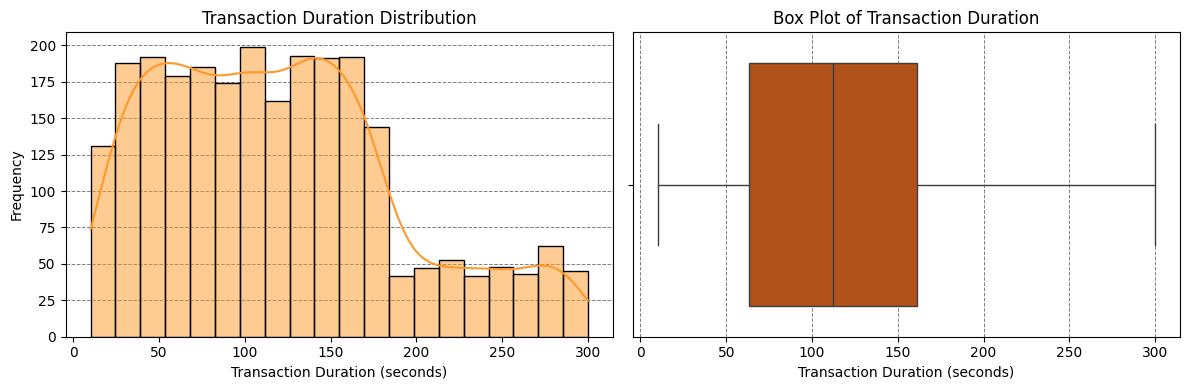


Summary Statistics for Transaction Duration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [13]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionDuration'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Duration Distribution')
axes[0].set_xlabel('Transaction Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionDuration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Duration')
axes[1].set_xlabel('Transaction Duration (seconds)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Duration:\n', df['TransactionDuration'].describe())

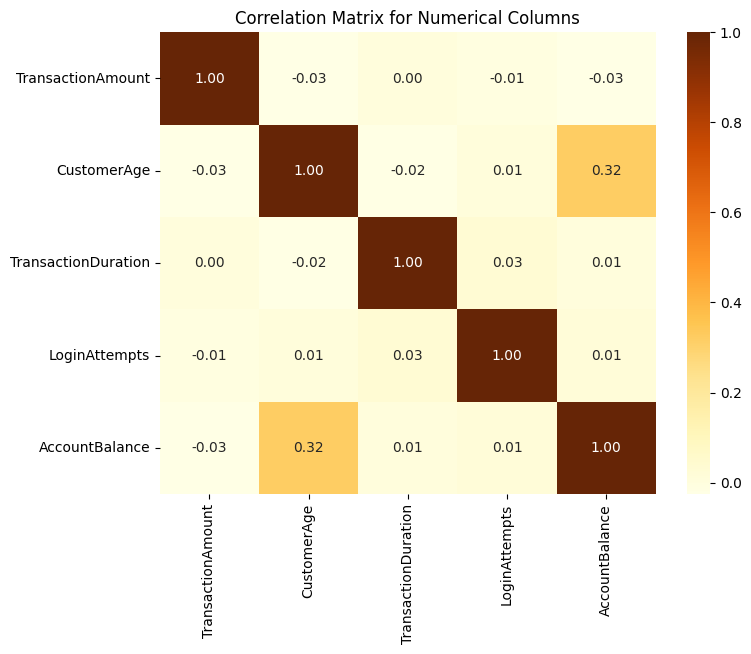

In [14]:
# Define the YlOrBr colormap
cmap = "YlOrBr"

# Display correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


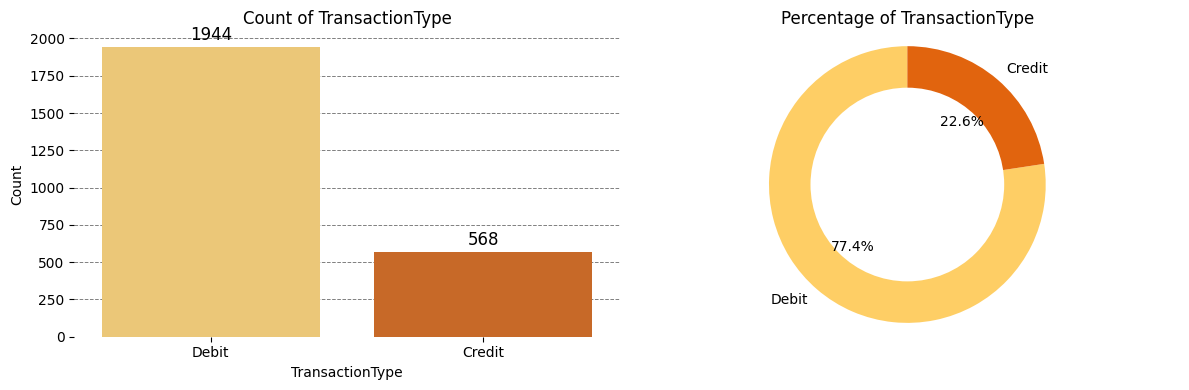

In [15]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

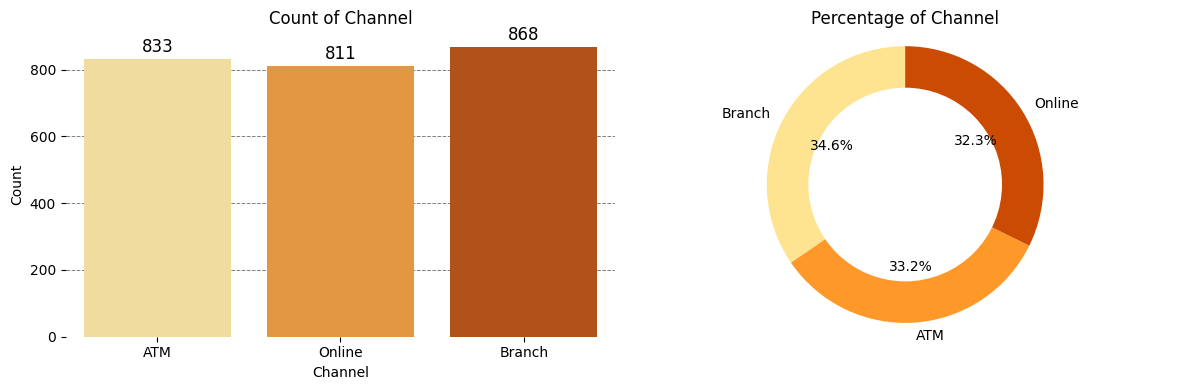

In [16]:
plot_categorical_distribution(df, 'Channel')

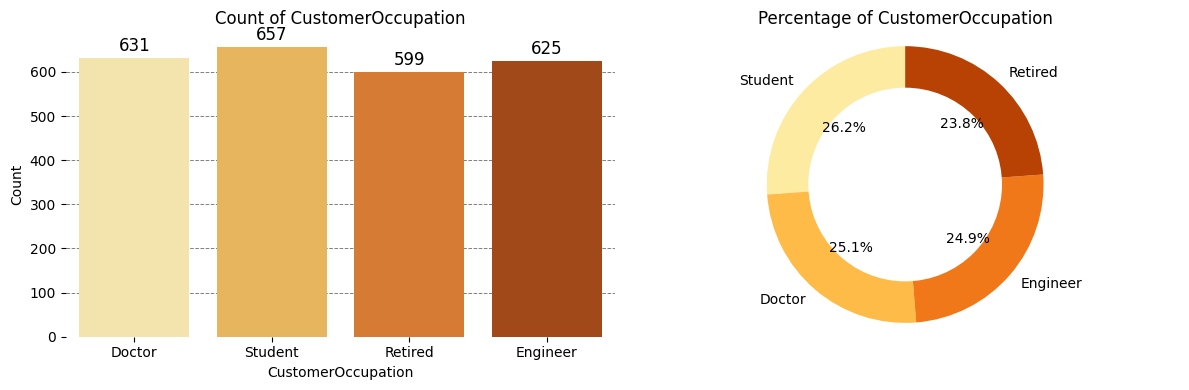

In [17]:
plot_categorical_distribution(df, 'CustomerOccupation')

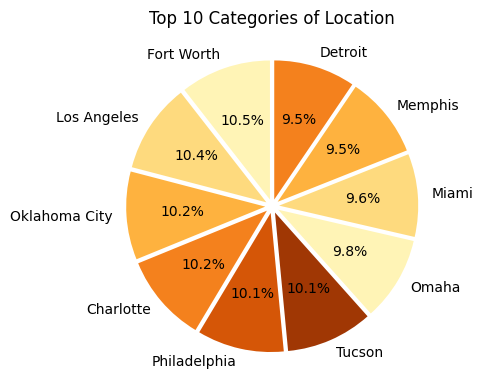

In [18]:
def plot_top_categories_pie_chart(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(8, 4))

    top_categories = data[column_name].value_counts().nlargest(10)

    top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                             startangle=90, explode=[0.05] * len(top_categories))

    plt.title(f'Top 10 Categories of {column_name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

plot_top_categories_pie_chart('Location')

In [19]:
location_stats = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(location_stats.nlargest(10, 'count')) # Top 10 locations by transaction count

               count        mean  median
Location                                
Fort Worth        70  296.810571  240.41
Los Angeles       69  285.155797  170.19
Charlotte         68  260.039118  185.15
Oklahoma City     68  319.353529  226.50
Philadelphia      67  290.586866  177.05
Tucson            67  305.369552  214.83
Omaha             65  283.143846  178.91
Miami             64  265.144219  168.07
Detroit           63  327.139048  235.40
Houston           63  308.200794  224.19


In [20]:
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(merchant_stats.nlargest(10, 'count')) # Top 10 merchants by transaction count, with amount stats

            count        mean   median
MerchantID                            
M026           45  308.114444  185.990
M066           34  351.433824  244.210
M013           33  315.646970  236.810
M014           33  286.909091  256.800
M028           33  312.615758  180.940
M065           33  240.501818  166.550
M001           32  260.002500  145.850
M005           32  346.872813  275.325
M015           32  298.023438  171.250
M068           32  302.502187  269.905


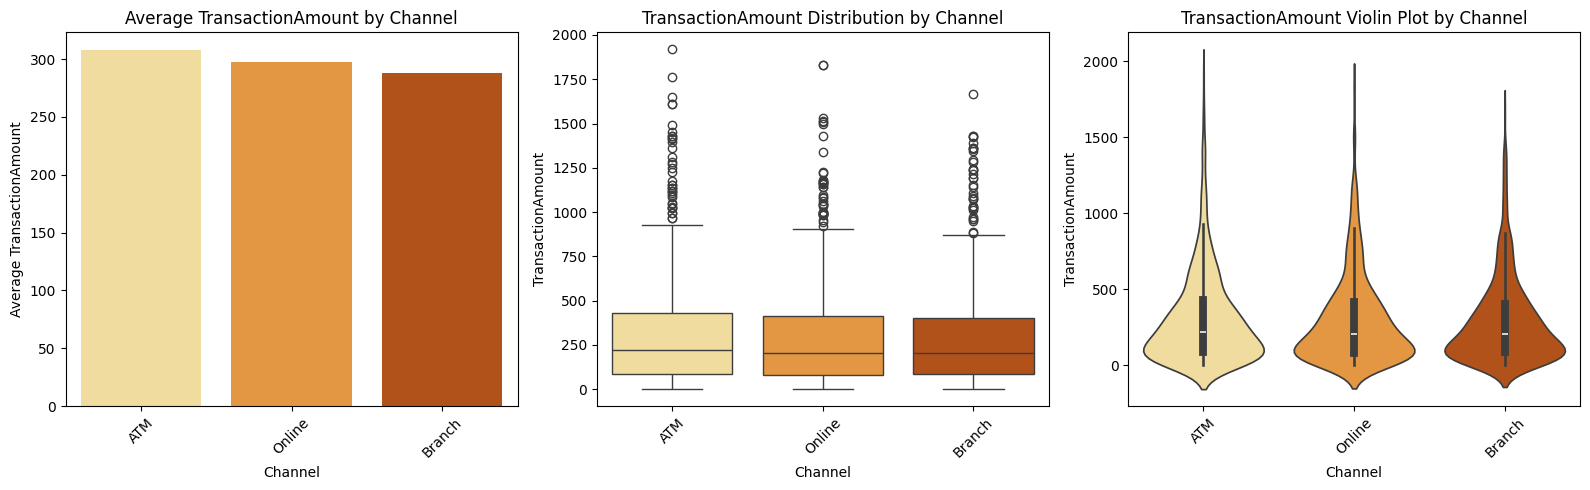

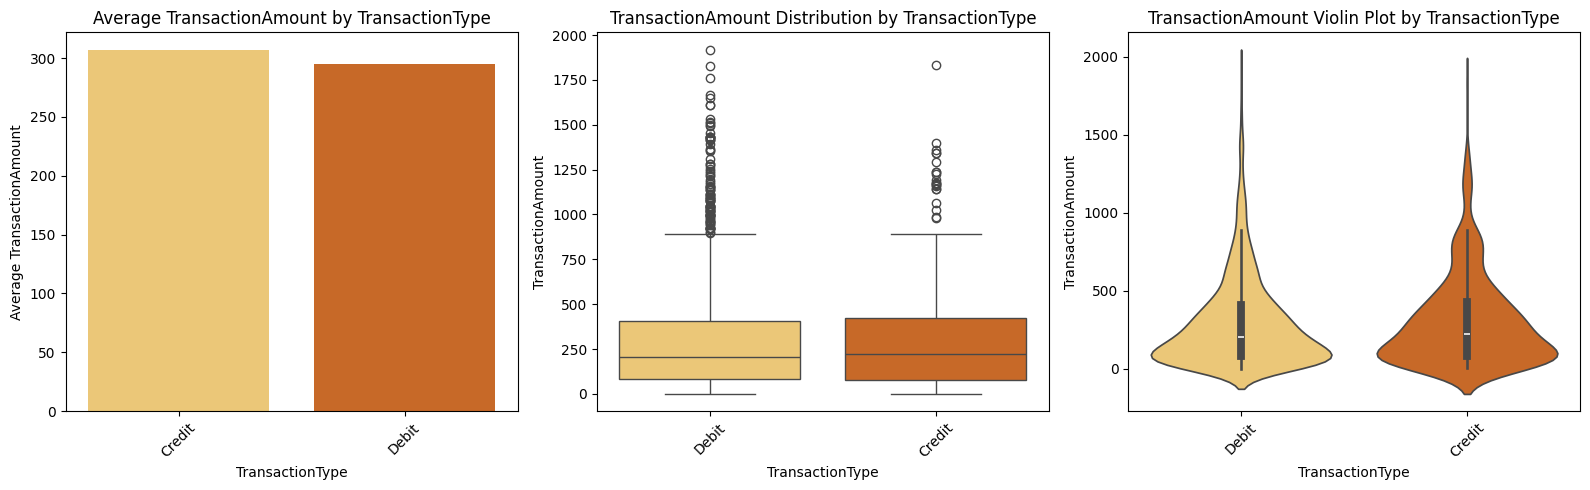

In [21]:
def plot_categorical_relationships(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
plot_categorical_relationships('Channel')

plot_categorical_relationships('TransactionType')


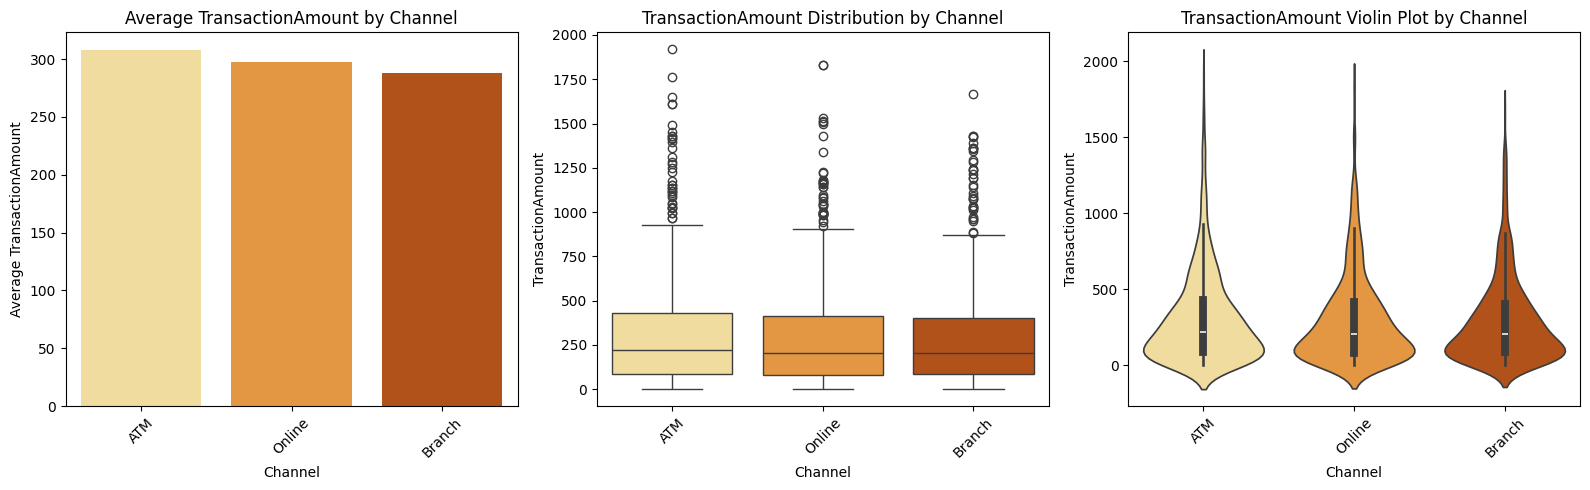

In [22]:
plot_categorical_relationships('Channel')

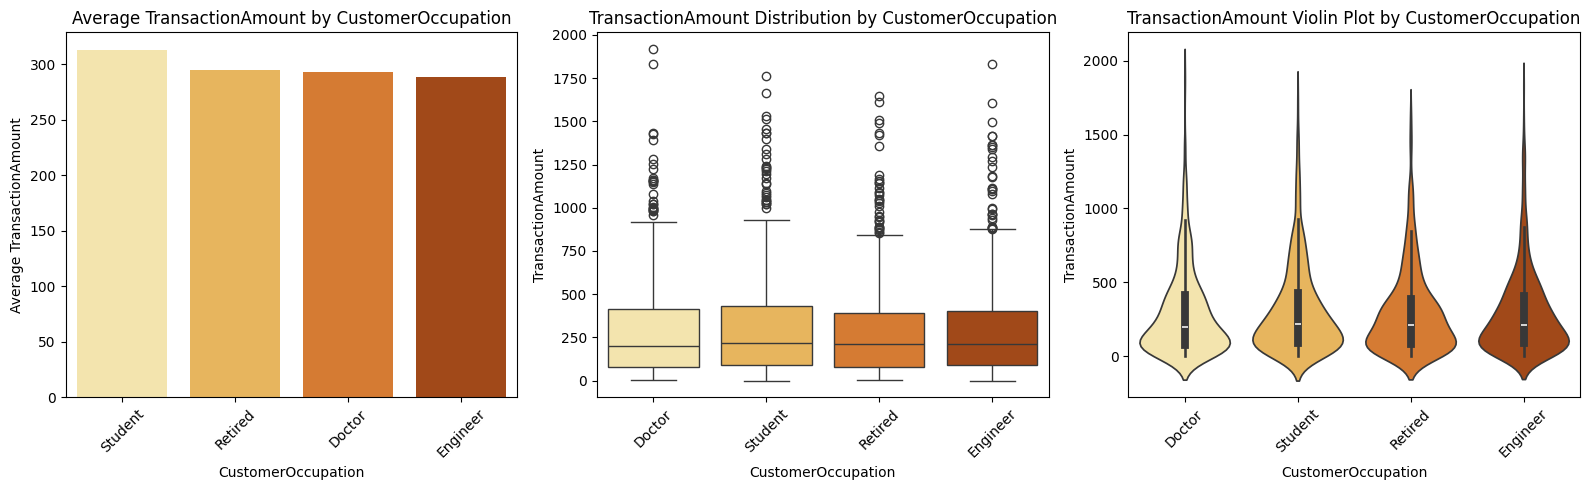

In [23]:
plot_categorical_relationships('CustomerOccupation')

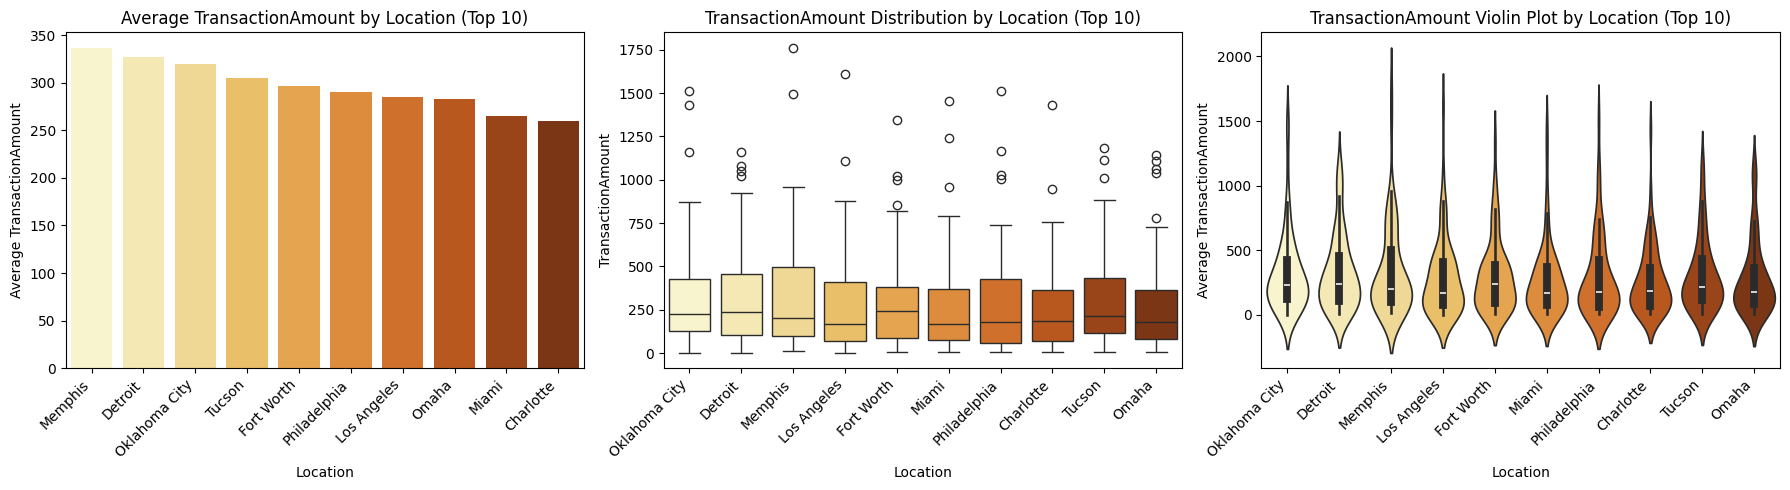

In [24]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15, palette='YlOrBr'):
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_categorical_relationships_improved('Location', top_n=10)

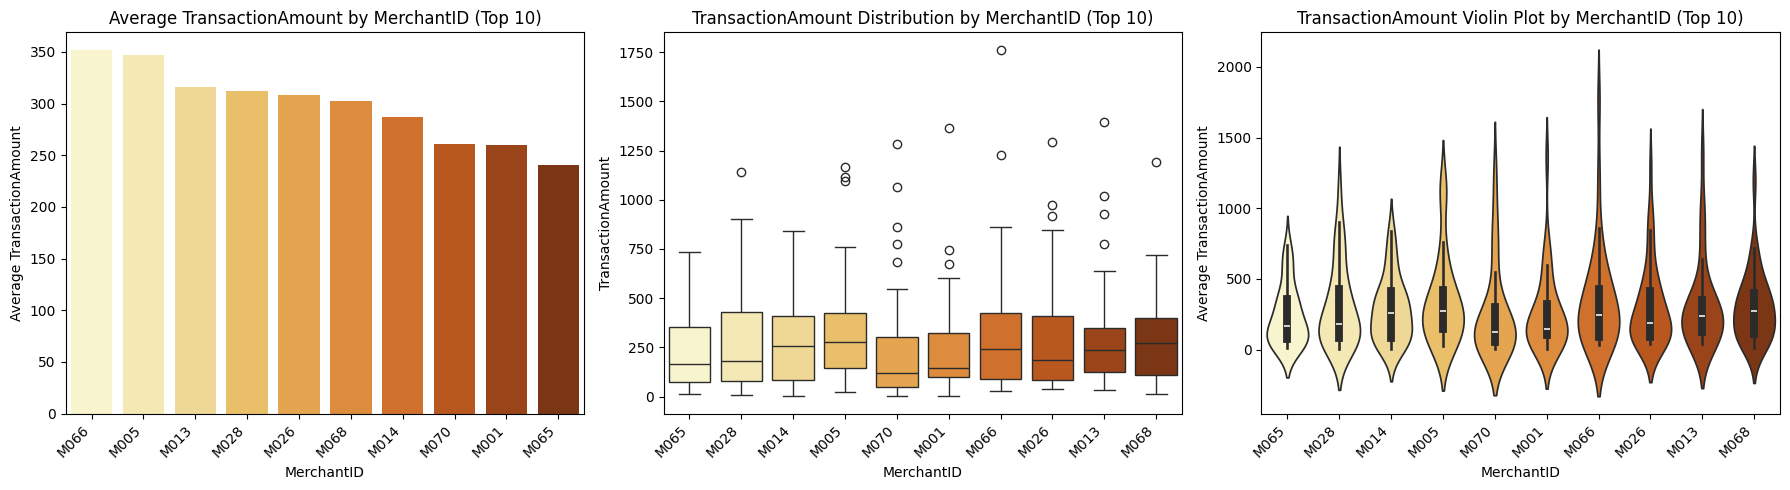

In [25]:
plot_categorical_relationships_improved('MerchantID', top_n=10)


Number of high-value transactions (top 5%): 126


TransactionID AccountID  TransactionAmount      TransactionDate  \
74       TX000075   AC00265            1212.51  2023-10-04 16:36:29   
82       TX000083   AC00236             922.55  2023-01-23 16:32:48   
85       TX000086   AC00098            1340.19  2023-09-29 17:22:10   
110      TX000111   AC00068            1045.22  2023-11-22 16:13:39   
129      TX000130   AC00320            1036.66  2023-07-11 16:39:53   

    TransactionType      Location DeviceID      IP Address MerchantID Channel  \
74            Debit  Indianapolis  D000231    193.83.0.183       M036  Branch   
82            Debit       Detroit  D000206    21.97.154.92       M004     ATM   
85           Credit        Austin  D000574  165.114.224.47       M012  Online   
110           Debit      Columbus  D000400    77.7.223.184       M077     ATM   
129           Debit   San Antonio  D000015  53.218.177.171       M062  Branch   

     CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
74            20            Student                   24              1   
82            63            Retired                   87              1   
85            54           Engineer                   30              1   
110           53            Retired                   73              1   
129           58             Doctor                  144              1   

     AccountBalance PreviousTransactionDate  
74           605.95     2024-11-04 08:06:51  
82          4715.84     2024-11-04 08:11:07  
85          8654.28     2024-11-04 08:06:53  
110         1829.90     2024-11-04 08:07:35  
129         5541.57     2024-11-04 08:09:24

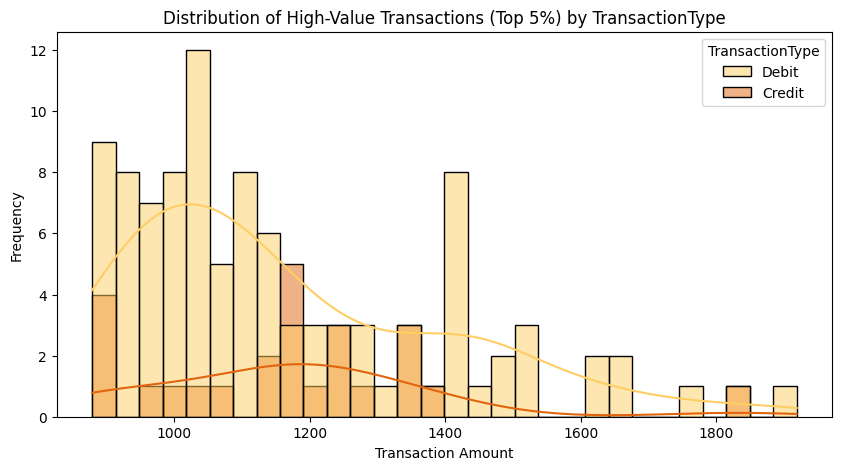

In [26]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

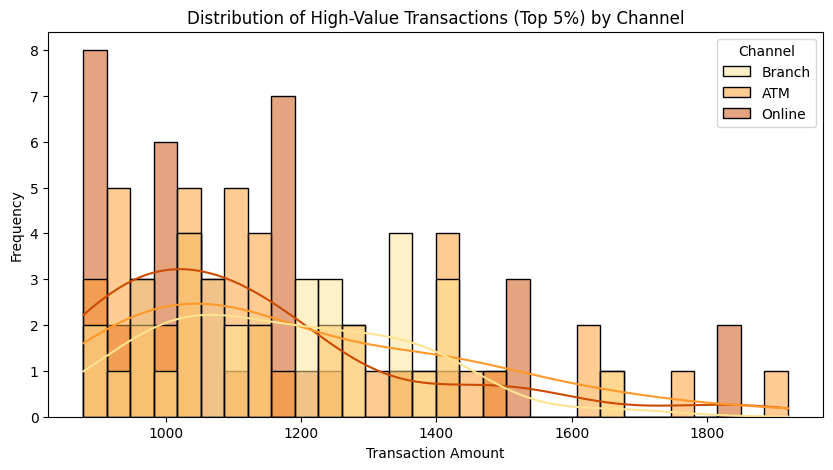

In [27]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


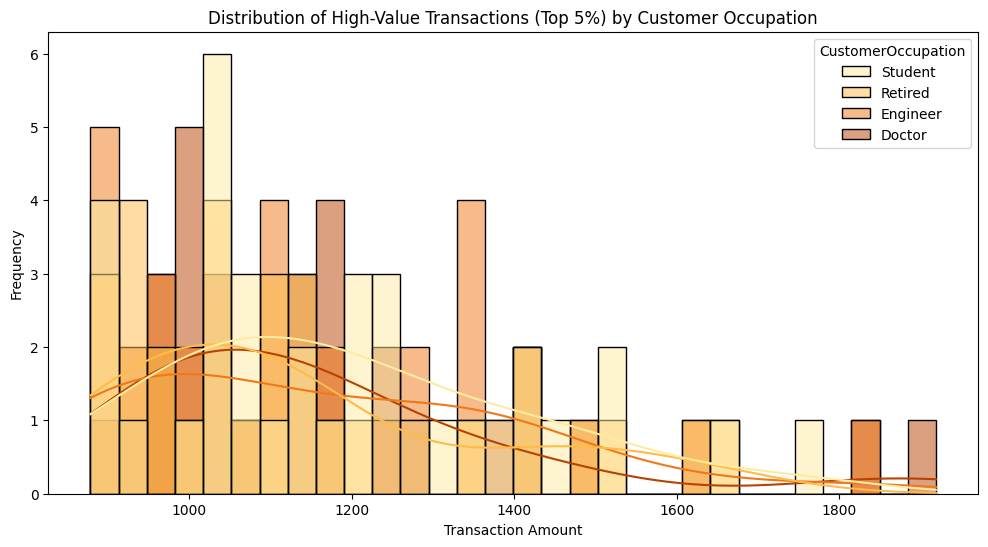

In [28]:
# Plotting high-value transactions with 'CustomerOccupation' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='CustomerOccupation', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Customer Occupation')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Number of frequent transactions (within 1 hour): 16


TransactionID AccountID  TransactionAmount     TransactionDate  \
95        TX000096   AC00010             508.68 2023-06-26 16:16:50   
1258      TX001259   AC00020             603.23 2023-08-24 17:34:13   
2497      TX002498   AC00030             348.17 2023-05-10 17:56:31   
496       TX000497   AC00114             286.50 2023-10-23 16:58:04   
2341      TX002342   AC00144              97.73 2023-05-29 17:55:23   

     TransactionType    Location DeviceID      IP Address MerchantID Channel  \
95            Credit        Mesa  D000622  193.108.17.115       M048  Branch   
1258           Debit     Detroit  D000238  38.210.156.148       M017  Branch   
2497           Debit     El Paso  D000269   82.51.236.134       M072     ATM   
496           Credit      Boston  D000602  16.128.130.153       M097  Branch   
2341           Debit  Sacramento  D000038  135.29.211.116       M018  Branch   

      CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
95             51           Engineer                  127              1   
1258           28            Student                   48              1   
2497           21            Student                  181              1   
496            30           Engineer                   60              1   
2341           69             Doctor                  156              1   

      AccountBalance PreviousTransactionDate  TimeDifference  
95           7708.41     2024-11-04 08:09:32           505.0  
1258          117.98     2024-11-04 08:08:18          2812.0  
2497         1887.84     2024-11-04 08:11:06           394.0  
496          8517.95     2024-11-04 08:09:17           451.0  
2341         7885.21     2024-11-04 08:08:27          2480.0

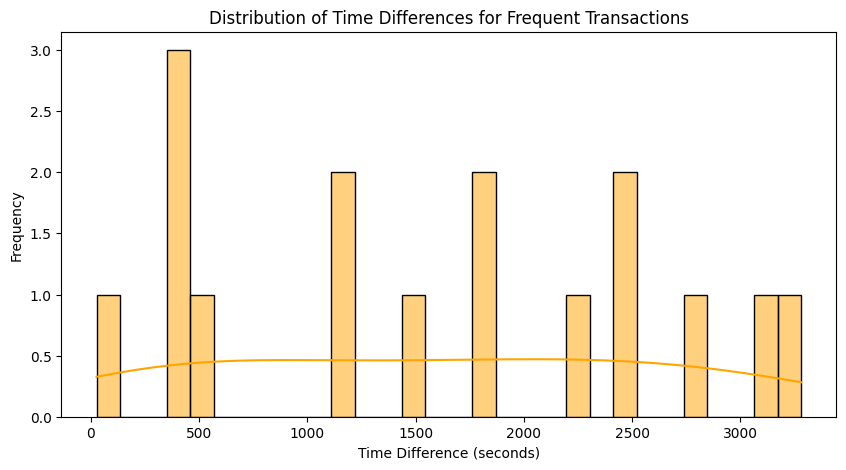

In [29]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Identify frequent transactions with short intervals
short_interval_threshold = 3600  # 1 hour in seconds
frequent_transactions = df_sorted[df_sorted['TimeDifference'] <= short_interval_threshold]

print(f"Number of frequent transactions (within 1 hour): {len(frequent_transactions)}")
display(frequent_transactions.head())

# Plot the distribution of time differences for visualization
plt.figure(figsize=(10, 5))
sns.histplot(frequent_transactions['TimeDifference'], bins=30, kde=True, color = "orange")
plt.title('Distribution of Time Differences for Frequent Transactions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()


Number of transactions with large balance changes: 125


TransactionID AccountID  TransactionAmount     TransactionDate  \
1       TX000002   AC00455             376.24 2023-06-27 16:44:19   
6       TX000007   AC00199               7.08 2023-02-15 16:36:48   
34      TX000035   AC00365             255.26 2023-10-27 16:42:49   
41      TX000042   AC00480              34.02 2023-01-09 16:13:21   
42      TX000043   AC00120             241.42 2023-04-20 18:57:43   

   TransactionType       Location DeviceID       IP Address MerchantID  \
1            Debit        Houston  D000051      13.149.61.4       M052   
6           Credit        Seattle  D000241  140.212.253.222       M019   
34          Credit  San Francisco  D000357    92.214.76.157       M002   
41           Debit   Philadelphia  D000627  109.105.179.186       M046   
42          Credit      Charlotte  D000198    60.89.202.192       M044   

   Channel  CustomerAge CustomerOccupation  TransactionDuration  \
1      ATM           68             Doctor                  141   
6      ATM           37             Doctor                  139   
34  Branch           45             Doctor                   50   
41  Online           38             Doctor                   19   
42  Online           57             Doctor                  116   

    LoginAttempts  AccountBalance PreviousTransactionDate  BalanceChange  
1               1        13758.91     2024-11-04 08:09:35       13382.67  
6               1        13316.71     2024-11-04 08:10:09       13323.79  
34              1        14815.87     2024-11-04 08:10:51       15071.13  
41              1        14214.48     2024-11-04 08:11:45       14180.46  
42              1        13357.02     2024-11-04 08:09:03       13598.44

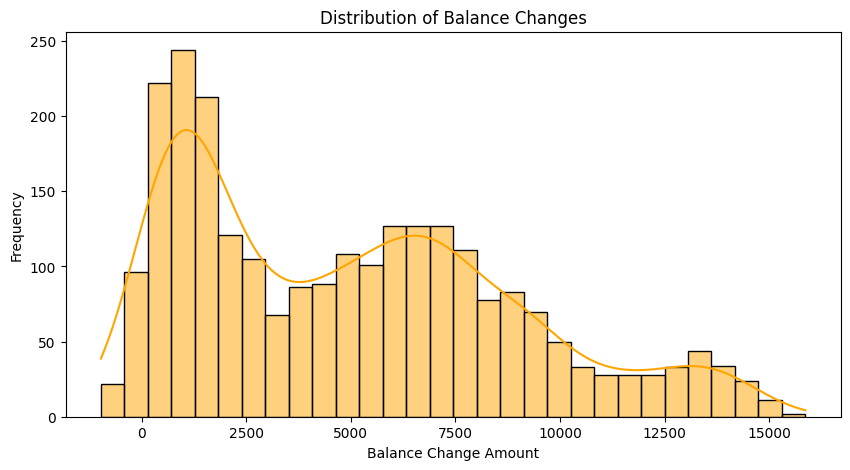

In [30]:
# Calculate change in AccountBalance for each transaction, considering TransactionType
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit'
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# Visualize balance changes
plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True, color = "orange")
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Group large balance changes by TransactionType and count occurrences
transaction_type_counts = large_balance_changes['TransactionType'].value_counts()
#print("Transaction Type Distribution for Large Balance Changes:\n", transaction_type_counts)

# Calculate percentages
transaction_type_percentages = large_balance_changes['TransactionType'].value_counts(normalize=True) * 100
#print("\nTransaction Type Percentages for Large Balance Changes:\n", transaction_type_percentages)

custom_palette = sns.color_palette("YlOrBr", 2)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='TransactionType', data=large_balance_changes, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Transaction Types for Large Balance Changes')
axes[0].set_xlabel('Transaction Type (Credit/Debit)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=12,
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

transaction_type_counts = large_balance_changes['TransactionType'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    transaction_type_counts,
    labels=transaction_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Transaction Types for Large Balance Changes')
axes[1].axis('equal')
plt.tight_layout()
plt.show()


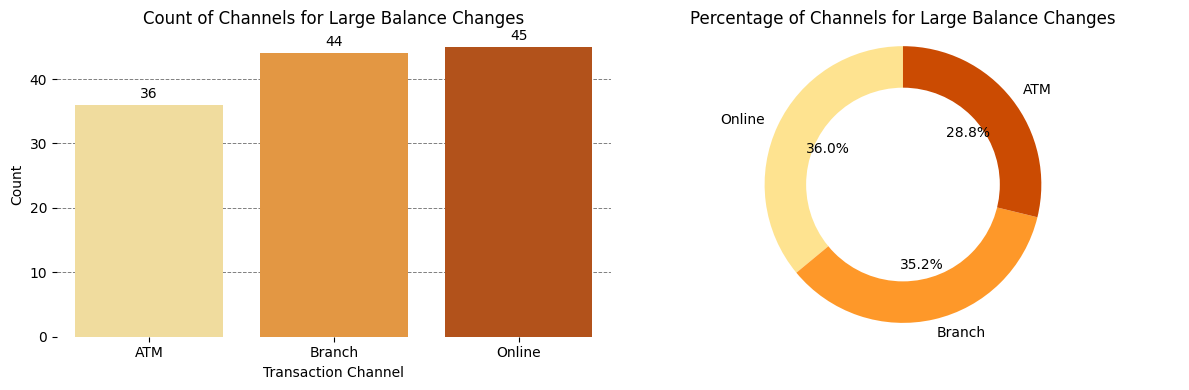

In [32]:
# Group by Channel and count occurrences
channel_counts = large_balance_changes['Channel'].value_counts()
# print("Channel Distribution for Large Balance Changes:\n", channel_counts)

# Calculate percentages
channel_percentages = large_balance_changes['Channel'].value_counts(normalize=True) * 100
# print("\nChannel Percentages for Large Balance Changes:\n", channel_percentages)

custom_palette = sns.color_palette("YlOrBr", len(channel_counts.index))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Channel', data=large_balance_changes, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Channels for Large Balance Changes')
axes[0].set_xlabel('Transaction Channel')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=10,
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

wedges, texts, autotexts = axes[1].pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Channels for Large Balance Changes')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

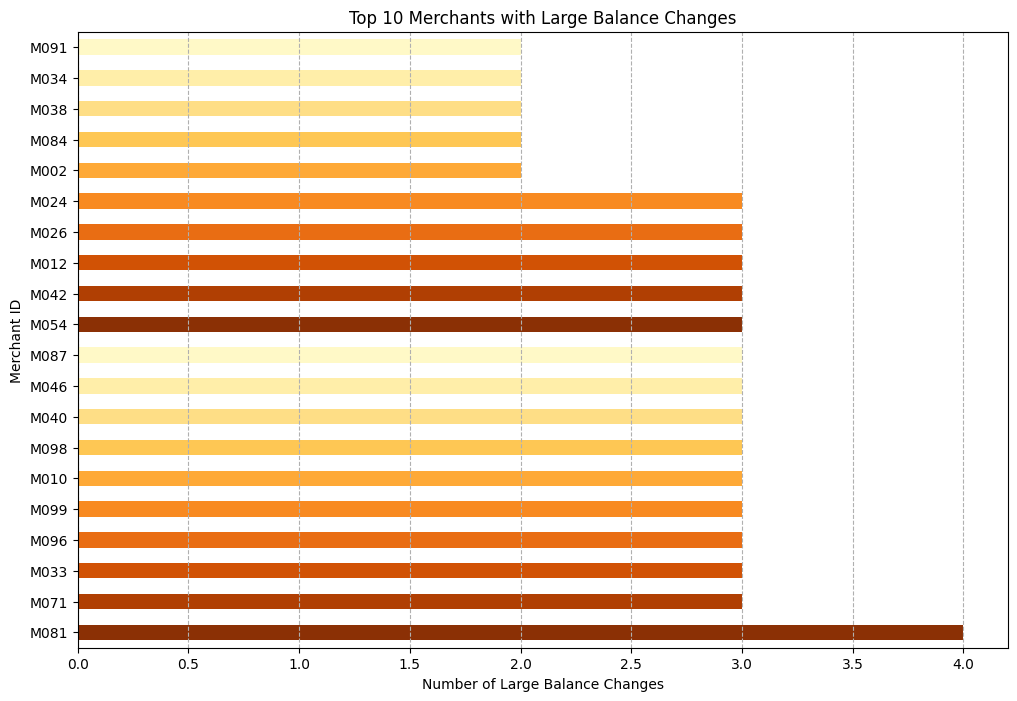

In [33]:
# Merchants
merchant_counts = large_balance_changes['MerchantID'].value_counts().nlargest(20)
# print("Top 10 Merchants with Large Balance Changes:\n", merchant_counts)

plt.figure(figsize=(12, 8))
merchant_counts.plot(kind='barh', color=sns.color_palette("YlOrBr_r", 10))
plt.title('Top 10 Merchants with Large Balance Changes')
plt.xlabel('Number of Large Balance Changes')
plt.ylabel('Merchant ID')
plt.grid(axis='x', linestyle='--')
plt.show()


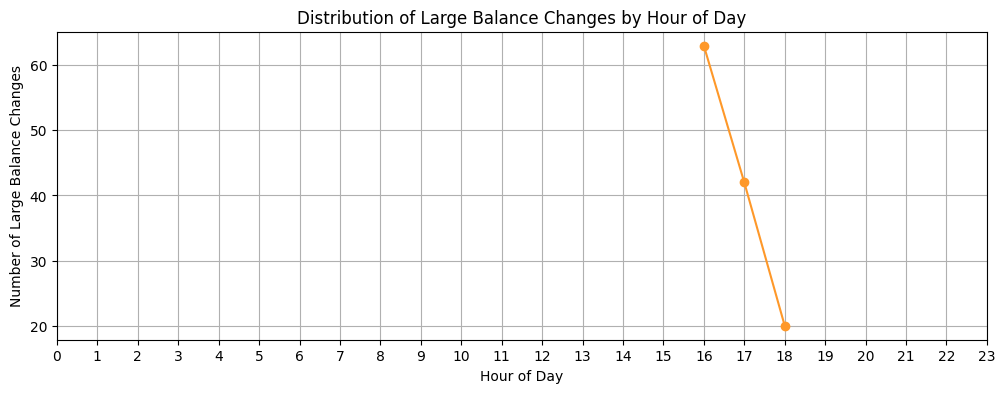

In [34]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract hour and day of week
large_balance_changes['TransactionHour'] = large_balance_changes['TransactionDate'].dt.hour
large_balance_changes['TransactionDayOfWeek'] = large_balance_changes['TransactionDate'].dt.day_name()

# Analyze by Hour
hour_counts = large_balance_changes['TransactionHour'].value_counts().sort_index()
# print("Distribution by Hour:\n", hour_counts)

plt.figure(figsize=(12, 4))
plt.plot(hour_counts.index, hour_counts.values, color=sns.color_palette("YlOrBr", 1)[0], marker='o')
plt.title('Distribution of Large Balance Changes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

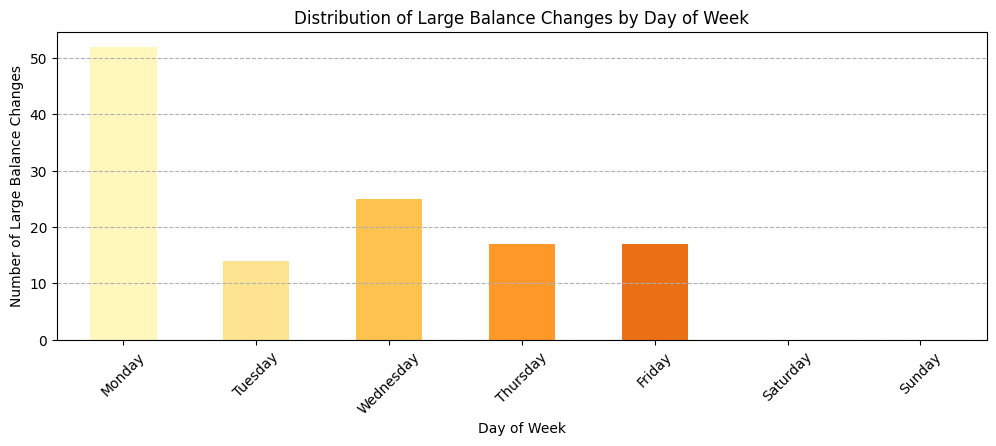

In [35]:
# Analyze by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = large_balance_changes['TransactionDayOfWeek'].value_counts().reindex(day_order)
# print("\nDistribution by Day of Week:\n", day_counts)

plt.figure(figsize=(12, 4))
day_counts.plot(kind='bar', color=sns.color_palette("YlOrBr", 7))
plt.title('Distribution of Large Balance Changes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

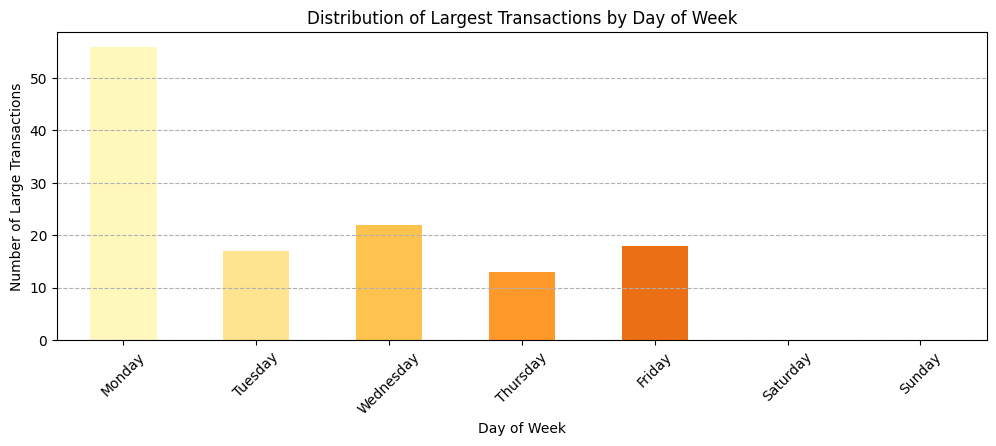

In [36]:
# Ensure TransactionDate is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract day of week
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()

# Identify largest transactions (Top 5% by TransactionAmount)
amount_threshold = df['TransactionAmount'].quantile(0.95)
largest_transactions = df[df['TransactionAmount'] >= amount_threshold]

# Analyze by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = (
    largest_transactions['TransactionDayOfWeek']
    .value_counts()
    .reindex(day_order)
)

# Plot distribution
plt.figure(figsize=(12, 4))
day_counts.plot(kind='bar', color=sns.color_palette("YlOrBr", 7))
plt.title('Distribution of Largest Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Large Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


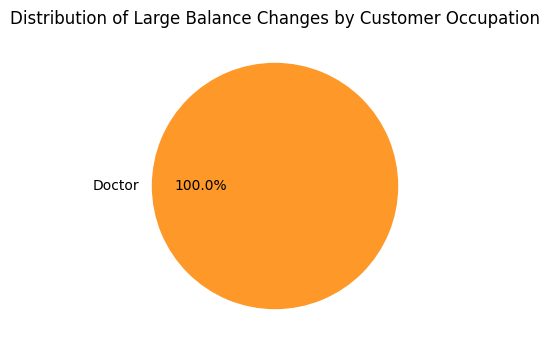

In [37]:
# Group by CustomerOccupation and count occurrences
occupation_counts = large_balance_changes['CustomerOccupation'].value_counts()
# print("Occupation Distribution for Large Balance Changes:\n", occupation_counts)

# Calculate percentages
occupation_percentages = large_balance_changes['CustomerOccupation'].value_counts(normalize=True) * 100
# print("\nOccupation Percentages for Large Balance Changes:\n", occupation_percentages)

num_occupations = len(occupation_counts)
plt.figure(figsize=(4,4))
if num_occupations <= 10:
    occupation_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('YlOrBr', num_occupations))
    plt.ylabel('')
else:
    occupation_counts.plot(kind='bar', color=sns.color_palette('YlOrBr', num_occupations))
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.ylabel('Number of Large Balance Changes')


plt.title('Distribution of Large Balance Changes by Customer Occupation')
plt.show()


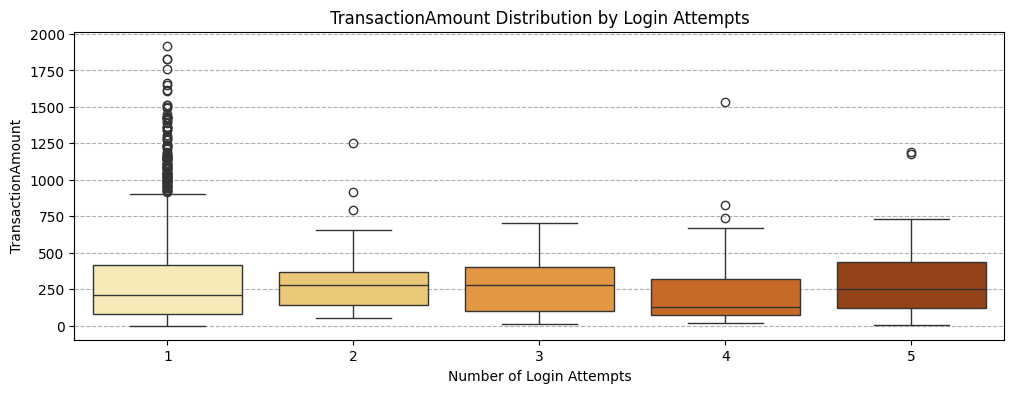

In [38]:
# Relationship between Login Attempts and TransactionAmount
plt.figure(figsize=(12, 4))
sns.boxplot(x='LoginAttempts', y='TransactionAmount', data=df, palette='YlOrBr')
plt.title('TransactionAmount Distribution by Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('TransactionAmount')
plt.grid(axis='y', linestyle='--')
plt.show()

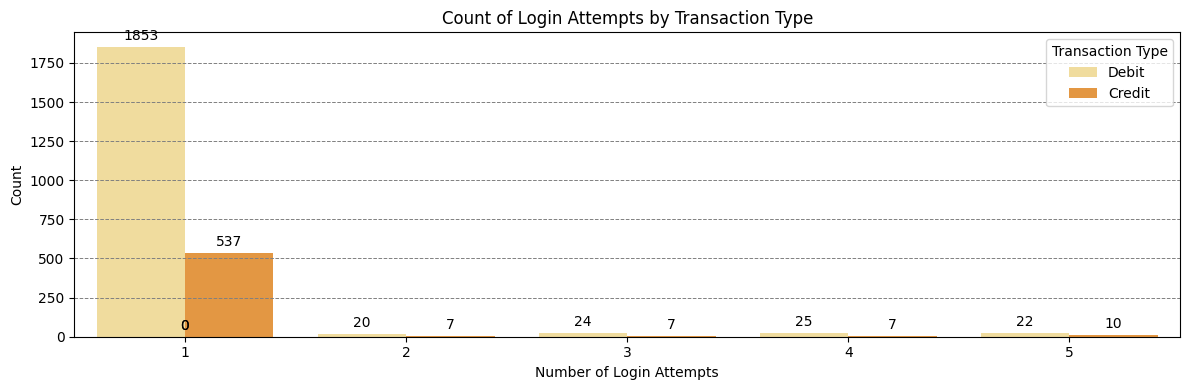

In [39]:
# Create a count plot of Login Attempts by TransactionType
custom_palette = sns.color_palette("YlOrBr", 3)
plt.figure(figsize=(12, 4))
sns.countplot(x='LoginAttempts', hue='TransactionType', data=df, palette=custom_palette)
plt.title('Count of Login Attempts by Transaction Type')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Transaction Type')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

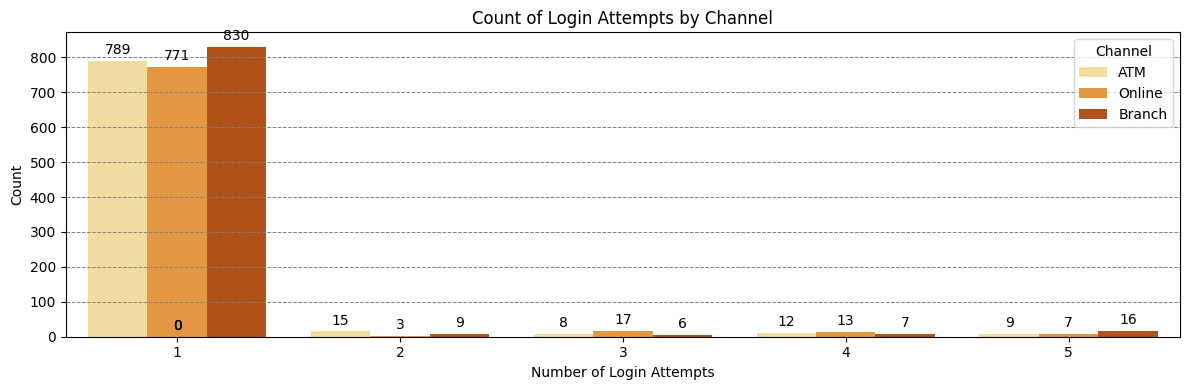

In [40]:
# Create a count plot of Login Attempts by Channel
custom_palette = sns.color_palette("YlOrBr", 3)
plt.figure(figsize=(12, 4))
sns.countplot(x='LoginAttempts', hue='Channel', data=df, palette=custom_palette)
plt.title('Count of Login Attempts by Channel')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Channel')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

In [41]:
# Transactions with more than onelogin attempt
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

Number of transactions with more than one login attempt: 122


TransactionID AccountID  TransactionAmount     TransactionDate  \
23      TX000024   AC00453             345.84 2023-05-02 18:25:46   
26      TX000027   AC00441             246.93 2023-04-17 16:37:01   
32      TX000033   AC00060             396.45 2023-09-25 16:26:00   
38      TX000039   AC00478             795.31 2023-10-12 17:07:40   
61      TX000062   AC00002             263.99 2023-05-16 16:07:30   

   TransactionType    Location DeviceID      IP Address MerchantID Channel  \
23           Debit  Fort Worth  D000162  191.82.103.198       M083  Online   
26           Debit       Miami  D000046  55.154.161.250       M029     ATM   
32           Debit    New York  D000621  133.67.250.163       M007     ATM   
38           Debit        Mesa  D000077    49.29.37.185       M048     ATM   
61           Debit      Dallas  D000285    7.146.35.122       M087  Branch   

    CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
23           22            Student                  142              3   
26           23            Student                  158              5   
32           49           Engineer                  168              3   
38           66             Doctor                   90              2   
61           79            Retired                  227              2   

    AccountBalance PreviousTransactionDate  BalanceChange TransactionDayOfWeek  
23         1402.50     2024-11-04 08:07:04        1056.66              Tuesday  
26          673.35     2024-11-04 08:11:38         426.42               Monday  
32         9690.15     2024-11-04 08:11:13        9293.70               Monday  
38         7914.88     2024-11-04 08:11:17        7119.57             Thursday  
61         4175.02     2024-11-04 08:11:03        3911.03              Tuesday

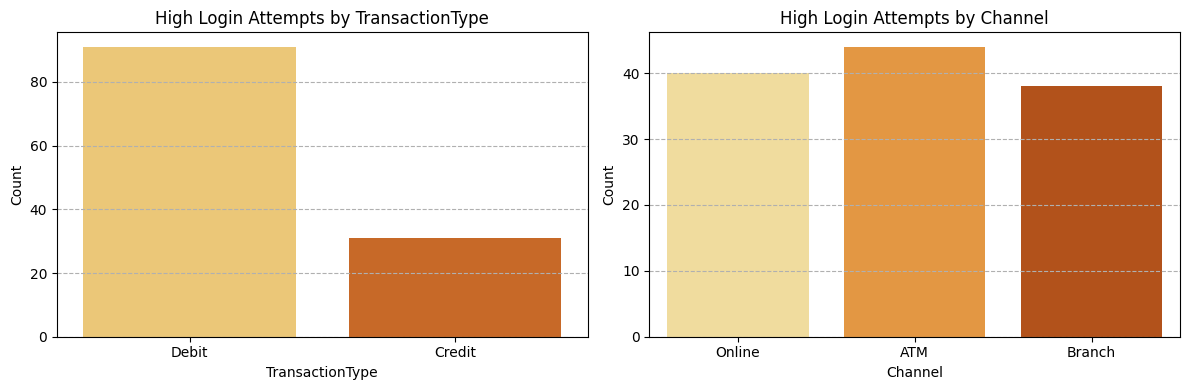

In [42]:
# Analyzing high login attempts with respect to TransactionType and Channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=high_login_attempts, x='TransactionType', palette=sns.color_palette("YlOrBr", 2))
plt.title('High Login Attempts by TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.countplot(data=high_login_attempts, x='Channel', palette=sns.color_palette("YlOrBr", len(high_login_attempts['Channel'].unique())))
plt.title('High Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

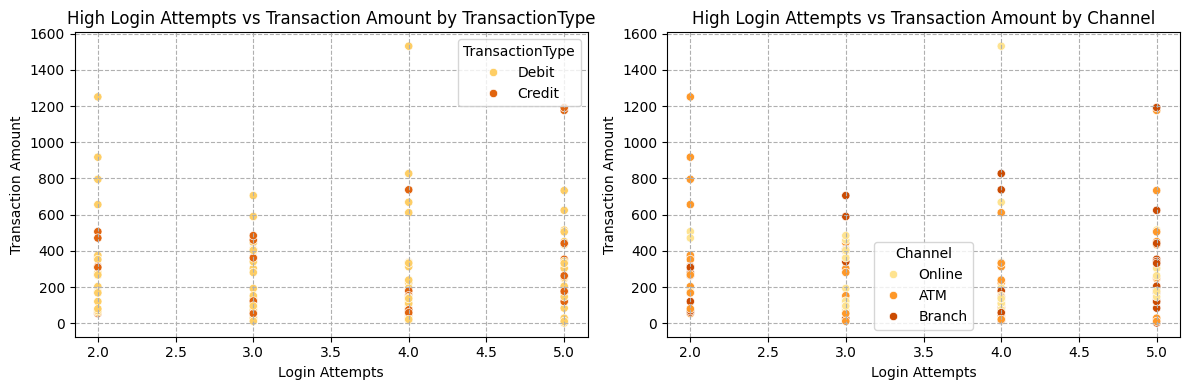

In [43]:
# Transactions with more than one login attempt
high_login_attempts = df[df['LoginAttempts'] > 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=high_login_attempts, x='LoginAttempts', y='TransactionAmount', hue='TransactionType', palette="YlOrBr", ax=axes[0])
axes[0].set_title('High Login Attempts vs Transaction Amount by TransactionType')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Transaction Amount')
axes[0].grid(True, linestyle='--')

sns.scatterplot(data=high_login_attempts, x='LoginAttempts', y='TransactionAmount', hue='Channel', palette="YlOrBr", ax=axes[1])
axes[1].set_title('High Login Attempts vs Transaction Amount by Channel')
axes[1].set_xlabel('Login Attempts')
axes[1].set_ylabel('Transaction Amount')
axes[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()

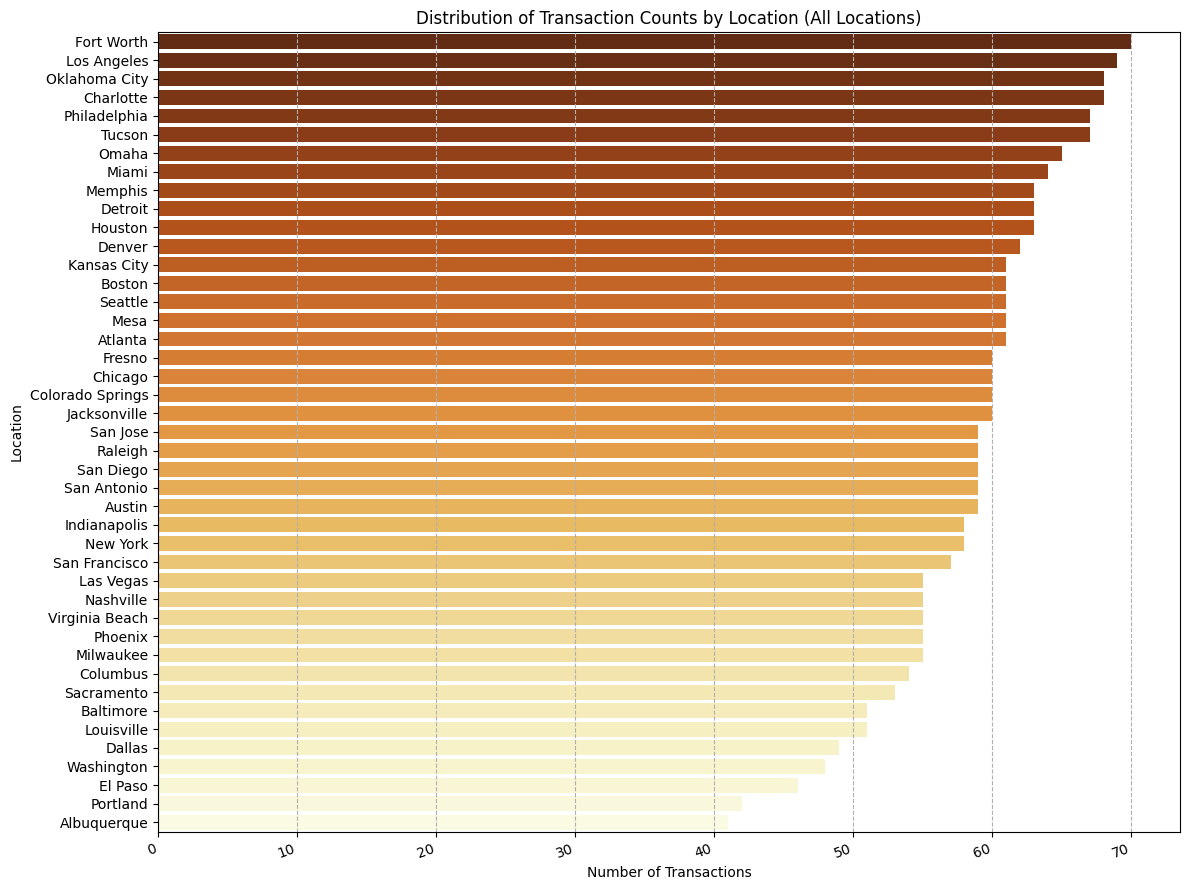

In [44]:
# Distribution of Transactions by Location (All Locations)
plt.figure(figsize=(12, 9))
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.values, y=location_counts.index, palette='YlOrBr_r')
plt.title('Distribution of Transaction Counts by Location (All Locations)')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()


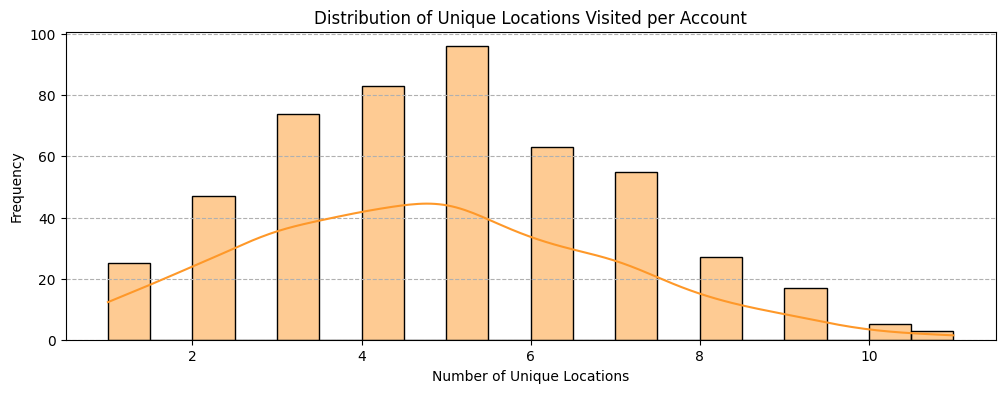

In [45]:
# Count unique locations per AccountID
location_counts_per_account = df.groupby('AccountID')['Location'].nunique().reset_index()
location_counts_per_account.columns = ['AccountID', 'UniqueLocations']

plt.figure(figsize=(12, 4))
sns.histplot(location_counts_per_account['UniqueLocations'], bins=20, kde=True, color=sns.color_palette("YlOrBr", 1)[0]) #Updated code
plt.title('Distribution of Unique Locations Visited per Account')
plt.xlabel('Number of Unique Locations')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()


In [46]:
# Merge unique location counts back to the original DataFrame
location_counts = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocations'})
uncommon_location_transactions = df.merge(location_counts, on='AccountID')
# Filter for accounts with more than 3 unique locations
uncommon_location_transactions = uncommon_location_transactions[uncommon_location_transactions['UniqueLocations'] > 3]
# Display results for accounts with transactions from multiple locations
print(f"\nNumber of accounts with transactions from multiple locations: {len(uncommon_location_transactions['AccountID'].unique())}")
display(uncommon_location_transactions.head())


Number of accounts with transactions from multiple locations: 349


TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  BalanceChange TransactionDayOfWeek  \
0         5112.21     2024-11-04 08:08:08        5098.12              Tuesday   
1        13758.91     2024-11-04 08:09:35       13382.67              Tuesday   
2         1122.35     2024-11-04 08:07:04         996.06               Monday   
3         8569.06     2024-11-04 08:09:06        8384.56               Friday   
4         7429.40     2024-11-04 08:06:39        7442.85               Monday   

   UniqueLocations  
0                7  
1                7  
2                4  
3                7  
4                6

In [47]:
# Identifying Accounts with Significant Location Shifts (duplicate logic removed)
print(f"\nIdentifying Accounts with Significant Location Shifts:")
significant_location_shifts = location_counts[location_counts['UniqueLocations'] > 4]
display(significant_location_shifts.head(10))


Identifying Accounts with Significant Location Shifts:


AccountID  UniqueLocations
1    AC00002                7
2    AC00003                5
3    AC00004                9
4    AC00005                9
6    AC00007                5
8    AC00009                5
9    AC00010                7
10   AC00011                5
11   AC00012                6
12   AC00013                7

In [48]:
# Step 1: Count unique locations per account
location_counts = (
    df.groupby('AccountID')['Location']
    .nunique()
    .reset_index()
    .rename(columns={'Location': 'UniqueLocations'})
)

# Step 2: Merge unique location counts back to original DataFrame
uncommon_location_transactions = df.merge(location_counts, on='AccountID')

# Step 3: Filter for accounts with more than 3 unique locations
uncommon_location_transactions = uncommon_location_transactions[
    uncommon_location_transactions['UniqueLocations'] > 3
]

# Step 4: Filter down to top 30 largest transactions (additional step)
top_30_largest_transactions = (
    uncommon_location_transactions
    .sort_values(by='TransactionAmount', ascending=False)
    .head(30)
)

# Display results
print(
    f"\nNumber of accounts with unique locations and top 30 largest transactions: "
    f"{top_30_largest_transactions['AccountID'].nunique()}"
)
display(top_30_largest_transactions)



Number of accounts with unique locations and top 30 largest transactions: 30


TransactionID AccountID  TransactionAmount     TransactionDate  \
653       TX000654   AC00423            1919.11 2023-06-27 17:48:25   
1438      TX001439   AC00179            1831.02 2023-09-15 17:31:42   
340       TX000341   AC00107            1830.00 2023-03-01 16:31:58   
1634      TX001635   AC00358            1762.28 2023-10-06 16:05:34   
1247      TX001248   AC00071            1647.74 2023-12-25 17:41:30   
1788      TX001789   AC00338            1612.37 2023-07-24 17:46:13   
755       TX000756   AC00460            1607.55 2023-09-07 16:27:03   
898       TX000899   AC00083            1531.31 2023-10-23 18:00:29   
1984      TX001985   AC00303            1512.99 2023-08-08 17:15:50   
1353      TX001354   AC00312            1510.71 2023-06-15 16:48:29   
2403      TX002404   AC00111            1493.00 2023-06-07 17:05:41   
2272      TX002273   AC00268            1454.52 2023-09-22 16:13:06   
1133      TX001134   AC00095            1432.02 2023-09-08 17:50:09   
2201      TX002202   AC00385            1431.54 2023-12-11 16:23:59   
1609      TX001610   AC00273            1431.33 2023-01-17 17:50:51   
475       TX000476   AC00464            1431.30 2023-09-04 18:46:40   
1917      TX001918   AC00382            1427.71 2023-01-24 17:26:34   
190       TX000191   AC00396            1422.55 2023-07-10 17:49:18   
486       TX000487   AC00148            1416.69 2023-01-16 17:00:11   
1281      TX001282   AC00128            1397.59 2023-11-13 17:28:12   
375       TX000376   AC00316            1392.54 2023-11-20 16:51:14   
176       TX000177   AC00363            1362.55 2023-02-10 18:07:07   
2267      TX002268   AC00416            1360.67 2023-04-19 16:38:41   
1625      TX001626   AC00220            1360.01 2023-09-25 16:51:23   
1672      TX001673   AC00344            1353.93 2023-11-15 17:32:11   
614       TX000615   AC00466            1342.25 2023-04-28 18:11:55   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
725       TX000726   AC00067            1309.79 2023-03-06 16:33:43   
1703      TX001704   AC00205            1294.81 2023-12-11 16:53:08   
344       TX000345   AC00156            1271.90 2023-08-28 16:43:15   

     TransactionType          Location DeviceID       IP Address MerchantID  \
653            Debit          Portland  D000191  207.157.126.125       M033   
1438          Credit          Columbus  D000246    141.121.30.32       M012   
340            Debit       San Antonio  D000436    62.27.235.199       M082   
1634           Debit           Memphis  D000008    26.105.49.129       M066   
1247           Debit        Louisville  D000593  113.137.153.101       M049   
1788           Debit       Los Angeles  D000025   16.128.130.153       M078   
755            Debit           Phoenix  D000070    94.37.250.128       M031   
898            Debit         San Diego  D000319   91.204.200.167       M078   
1984           Debit      Philadelphia  D000032  195.164.171.146       M071   
1353           Debit     Oklahoma City  D000106  193.209.134.233       M060   
2403           Debit  Colorado Springs  D000344  136.162.111.135       M096   
2272           Debit             Miami  D000598    34.169.232.37       M088   
1133           Debit        Louisville  D000263   105.87.212.115       M081   
2201           Debit          Portland  D000490   68.254.244.208       M075   
1609           Debit         Charlotte  D000434     13.88.251.53       M075   
475            Debit     Oklahoma City  D000563     7.105.184.86       M082   
1917           Debit          New York  D000015    59.208.79.116       M086   
190            Debit        Washington  D000569   188.124.181.12       M072   
486            Debit         Nashville  D000418   219.98.242.240       M015   
1281          Credit            Austin  D000117     4.134.78.167       M020   
375            Debit           El Paso  D000113    63.67.150.226       M013   
176            Debit           El Paso  D000213     93.52.44.101 

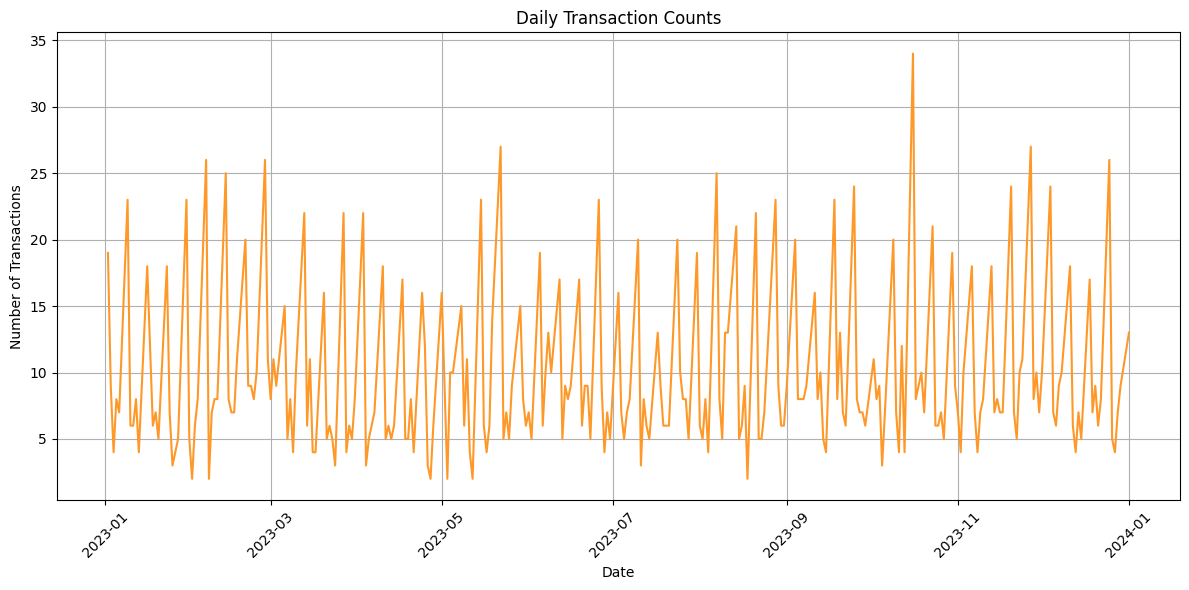

In [49]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Group by date and count transactions
daily_transactions = df.groupby(df['TransactionDate'].dt.date).size().reset_index(name='TransactionCount')
daily_transactions['TransactionDate'] = pd.to_datetime(daily_transactions['TransactionDate'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionCount', data=daily_transactions, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

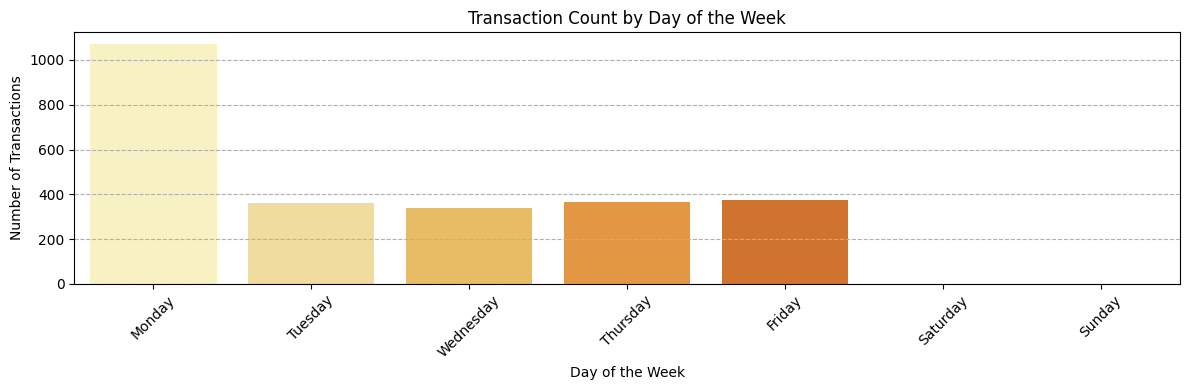

In [50]:
# Extract the day of the week
df['Day_of_Week'] = df['TransactionDate'].dt.day_name()

# Group by day of the week and count transactions
weekday_counts = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='YlOrBr')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [51]:
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

Number of transactions during unusual hours: 377


TransactionID AccountID  TransactionAmount     TransactionDate  \
2       TX000003   AC00019             126.29 2023-07-10 18:16:08   
17      TX000018   AC00359             492.93 2023-12-14 18:32:14   
19      TX000020   AC00285              71.48 2023-06-08 18:18:50   
21      TX000022   AC00014              85.77 2023-08-11 18:31:31   
22      TX000023   AC00095              52.20 2023-06-06 18:54:15   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
2            Debit       Mesa  D000235  215.97.143.157       M009  Online   
17           Debit   Columbus  D000432  114.223.129.47       M059  Online   
19          Credit   Columbus  D000039   120.170.93.69       M039  Online   
21           Debit  Las Vegas  D000268  59.132.247.252       M065  Branch   
22           Debit    Atlanta  D000142    133.63.96.21       M022  Online   

    CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
2            19            Student                   56              1   
17           39           Engineer                  234              1   
19           18            Student                  169              1   
21           38             Doctor                   93              1   
22           39           Engineer                  120              1   

    AccountBalance PreviousTransactionDate  BalanceChange  \
2          1122.35     2024-11-04 08:07:04         996.06   
17         5109.97     2024-11-04 08:11:51        4617.04   
19         6568.59     2024-11-04 08:09:20        6640.07   
21         9146.19     2024-11-04 08:08:13        9060.42   
22         8974.93     2024-11-04 08:07:01        8922.73   

   TransactionDayOfWeek Day_of_Week  TransactionHour  
2                Monday      Monday               18  
17             Thursday    Thursday               18  
19             Thursday    Thursday               18  
21               Friday      Friday               18  
22              Tuesday     Tuesday               18

In [52]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette=custom_palette, ax=axes[0])
axes[0].set_title('Transactions During Unusual Hours by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5), textcoords='offset points')
sns.despine(left=True, bottom=True)

transaction_counts = unusual_hour_transactions['TransactionType'].value_counts()
axes[1].pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
axes[1].set_title('Distribution of Transaction Types During Unusual Hours')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

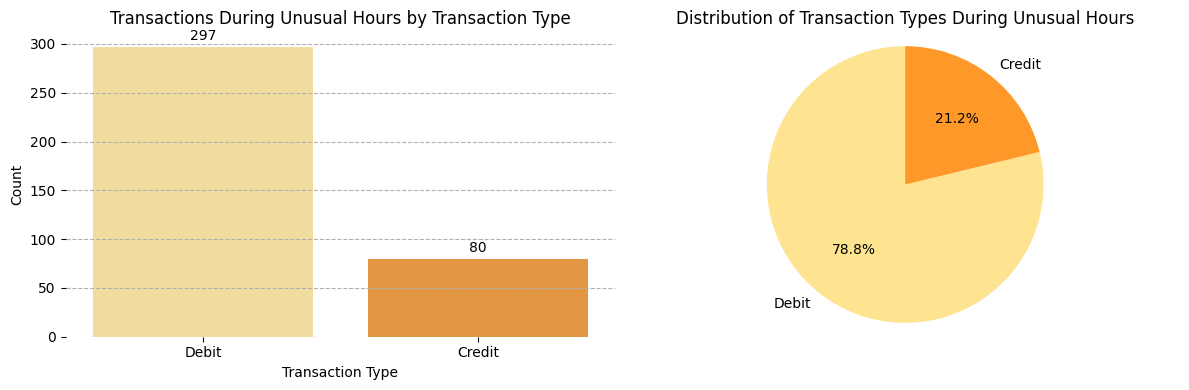

In [53]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette=custom_palette, ax=axes[0])
axes[0].set_title('Transactions During Unusual Hours by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5), textcoords='offset points')
sns.despine(left=True, bottom=True)

transaction_counts = unusual_hour_transactions['TransactionType'].value_counts()
axes[1].pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
axes[1].set_title('Distribution of Transaction Types During Unusual Hours')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


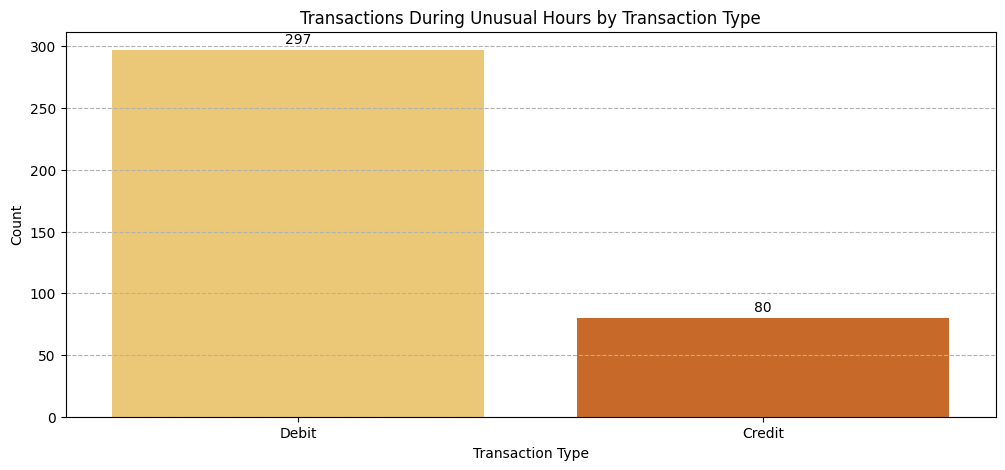

In [54]:
# Visualize transactions during unusual hours by type
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette='YlOrBr')
plt.title('Transactions During Unusual Hours by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                color='black', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [55]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sort data by AccountID and TransactionDate for accurate time difference calculations
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for each account
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Filter transactions with a time difference of less than 1 hour (3600 seconds)
rapid_transactions = df_sorted[df_sorted['TimeDifference'] <= 3600]

# Display the number of such transactions and a preview of the data
print(f"Number of transactions with time difference of less than 1 hour: {len(rapid_transactions)}")
display(rapid_transactions.head())

Number of transactions with time difference of less than 1 hour: 16


TransactionID AccountID  TransactionAmount     TransactionDate  \
95        TX000096   AC00010             508.68 2023-06-26 16:16:50   
1258      TX001259   AC00020             603.23 2023-08-24 17:34:13   
2497      TX002498   AC00030             348.17 2023-05-10 17:56:31   
496       TX000497   AC00114             286.50 2023-10-23 16:58:04   
2341      TX002342   AC00144              97.73 2023-05-29 17:55:23   

     TransactionType    Location DeviceID      IP Address MerchantID Channel  \
95            Credit        Mesa  D000622  193.108.17.115       M048  Branch   
1258           Debit     Detroit  D000238  38.210.156.148       M017  Branch   
2497           Debit     El Paso  D000269   82.51.236.134       M072     ATM   
496           Credit      Boston  D000602  16.128.130.153       M097  Branch   
2341           Debit  Sacramento  D000038  135.29.211.116       M018  Branch   

      ...  CustomerOccupation TransactionDuration  LoginAttempts  \
95    ...            Engineer                 127              1   
1258  ...             Student                  48              1   
2497  ...             Student                 181              1   
496   ...            Engineer                  60              1   
2341  ...              Doctor                 156              1   

      AccountBalance  PreviousTransactionDate BalanceChange  \
95           7708.41      2024-11-04 08:09:32       8217.09   
1258          117.98      2024-11-04 08:08:18       -485.25   
2497         1887.84      2024-11-04 08:11:06       1539.67   
496          8517.95      2024-11-04 08:09:17       8804.45   
2341         7885.21      2024-11-04 08:08:27       7787.48   

      TransactionDayOfWeek Day_of_Week TransactionHour  TimeDifference  
95                  Monday      Monday              16           505.0  
1258              Thursday    Thursday              17          2812.0  
2497             Wednesday   Wednesday              17           394.0  
496                 Monday      Monday              16           451.0  
2341                Monday      Monday              17          2480.0  

[5 rows x 21 columns]

In [56]:
# Visualize the distribution of time differences for these transactions
plt.figure(figsize=(12, 4))
sns.histplot(rapid_transactions['TimeDifference'].dropna(), bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Time Differences (Less than 1 Hour) Between Transactions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [57]:
# Calculate average transaction amount per account
account_avg = df.groupby('AccountID')['TransactionAmount'].mean().reset_index().rename(columns={'TransactionAmount': 'AverageTransactionAmount'})
df = df.merge(account_avg, on='AccountID')
# Identify transactions that are 3 times above the average for the account
unusual_transactions = df[df['TransactionAmount'] > (df['AverageTransactionAmount'] * 3)]
print(f"Number of unusually high-value transactions: {len(unusual_transactions)}")
display(unusual_transactions.head())

Number of unusually high-value transactions: 62


TransactionID AccountID  TransactionAmount     TransactionDate  \
60       TX000061   AC00438             568.52 2023-10-06 18:44:37   
129      TX000130   AC00320            1036.66 2023-07-11 16:39:53   
141      TX000142   AC00114            1049.92 2023-10-23 16:50:33   
176      TX000177   AC00363            1362.55 2023-02-10 18:07:07   
190      TX000191   AC00396            1422.55 2023-07-10 17:49:18   

    TransactionType      Location DeviceID      IP Address MerchantID Channel  \
60            Debit  Indianapolis  D000233  27.143.109.203       M094     ATM   
129           Debit   San Antonio  D000015  53.218.177.171       M062  Branch   
141           Debit       Detroit  D000522   121.67.144.20       M052     ATM   
176           Debit       El Paso  D000213    93.52.44.101       M001     ATM   
190           Debit    Washington  D000569  188.124.181.12       M072  Branch   

     ...  CustomerOccupation TransactionDuration  LoginAttempts  \
60   ...            Engineer                 152              1   
129  ...              Doctor                 144              1   
141  ...             Retired                  21              1   
176  ...            Engineer                 106              1   
190  ...             Retired                 165              1   

     AccountBalance  PreviousTransactionDate BalanceChange  \
60          5499.91      2024-11-04 08:06:25       4931.39   
129         5541.57      2024-11-04 08:09:24       4504.91   
141         2037.85      2024-11-04 08:10:34        987.93   
176         2429.68      2024-11-04 08:11:05       1067.13   
190         5674.32      2024-11-04 08:06:50       4251.77   

     TransactionDayOfWeek Day_of_Week TransactionHour  \
60                 Friday      Friday              18   
129               Tuesday     Tuesday              16   
141                Monday      Monday              16   
176                Friday      Friday              18   
190                Monday      Monday              17   

     AverageTransactionAmount  
60                 165.691250  
129                335.652000  
141                317.322857  
176                391.909167  
190                410.837500  

[5 rows x 21 columns]

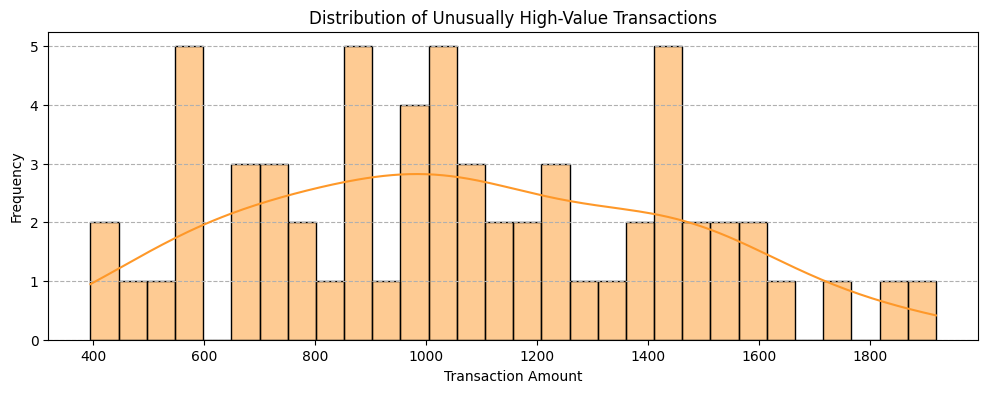

In [58]:
# Plot unusually high transactions
plt.figure(figsize=(12, 4))
sns.histplot(unusual_transactions['TransactionAmount'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unusually High-Value Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [59]:
# Group by AccountID to count unique locations
location_pattern = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocationsCount'})
# Merge and identify accounts with high variability in transaction locations
df = df.merge(location_pattern, on='AccountID')
high_location_variability = df[df['UniqueLocationsCount'] > 5]
print(f"Number of accounts with high location variability: {len(high_location_variability)}")
display(high_location_variability.head())

Number of accounts with high location variability: 1282


TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   
5      TX000006   AC00393              92.15 2023-04-03 17:15:01   

  TransactionType       Location DeviceID      IP Address MerchantID Channel  \
0           Debit      San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit        Houston  D000051     13.149.61.4       M052     ATM   
3           Debit        Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit        Atlanta  D000308    65.164.3.100       M091  Online   
5           Debit  Oklahoma City  D000579  117.67.192.211       M054     ATM   

   ...  TransactionDuration LoginAttempts  AccountBalance  \
0  ...                   81             1         5112.21   
1  ...                  141             1        13758.91   
3  ...                   25             1         8569.06   
4  ...                  198             1         7429.40   
5  ...                  172             1          781.68   

   PreviousTransactionDate  BalanceChange TransactionDayOfWeek  Day_of_Week  \
0      2024-11-04 08:08:08        5098.12              Tuesday      Tuesday   
1      2024-11-04 08:09:35       13382.67              Tuesday      Tuesday   
3      2024-11-04 08:09:06        8384.56               Friday       Friday   
4      2024-11-04 08:06:39        7442.85               Monday       Monday   
5      2024-11-04 08:06:36         689.53               Monday       Monday   

  TransactionHour AverageTransactionAmount  UniqueLocationsCount  
0              16               460.698571                     7  
1              16               304.622857                     7  
3              16               236.483750                     7  
4              17               280.796667                     6  
5              17               209.206250                     7  

[5 rows x 22 columns]

In [60]:
# Plot distribution of unique location counts
plt.figure(figsize=(12, 4))
sns.histplot(df['UniqueLocationsCount'], bins=20, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unique Transaction Locations per Account')
plt.xlabel('Number of Unique Locations')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()


In [61]:
# Analyze fraud likelihood by channel and transaction type
channel_analysis = df.groupby(['Channel', 'TransactionType'])['TransactionID'].count().reset_index()
channel_analysis.columns = ['Channel', 'TransactionType', 'Count']
print(channel_analysis)

  Channel TransactionType  Count
0     ATM          Credit     73
1     ATM           Debit    760
2  Branch          Credit    251
3  Branch           Debit    617
4  Online          Credit    244
5  Online           Debit    567


In [62]:
def plot_channel_transaction_visualization(ax, df, transaction_type):
    filtered_data = df[df['TransactionType'] == transaction_type]

    # Count Plot
    sns.countplot(y='Channel', data=filtered_data, ax=ax[0], palette='YlOrBr')
    ax[0].set_title(f'Channel Distribution for {transaction_type}')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Channel')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=10)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    channel_counts = filtered_data['Channel'].value_counts()
    ax[1].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr'))
    ax[1].set_title(f'Channel Distribution for {transaction_type}')
    ax[1].axis('equal')

unique_transaction_types = df['TransactionType'].unique()
num_transaction_types = len(unique_transaction_types)

fig, axes = plt.subplots(num_transaction_types, 2, figsize=(12, 4 * num_transaction_types))

for i, transaction_type in enumerate(unique_transaction_types):
    plot_channel_transaction_visualization(axes[i], df, transaction_type)

plt.tight_layout()
plt.show()


In [63]:
# Calculate merchant statistics
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(
    TotalTransactions='count',
    AverageTransactionAmount='mean',
    MaxTransactionAmount='max',
    StdTransactionAmount='std'
).reset_index()

# Define criteria for outliers
overall_std = df['TransactionAmount'].std()
overall_mean = df['TransactionAmount'].mean()

high_std_merchants = merchant_stats[merchant_stats['StdTransactionAmount'] > overall_std]
high_value_merchants = merchant_stats[merchant_stats['MaxTransactionAmount'] > (overall_mean * 3)]
high_transaction_count_merchants = merchant_stats[merchant_stats['TotalTransactions'] > merchant_stats['TotalTransactions'].quantile(0.95)]

# Combine criteria
outlier_merchants = pd.concat([high_std_merchants, high_value_merchants, high_transaction_count_merchants]).drop_duplicates()

# Visualize and analyze
print(f"Number of identified outlier merchants: {len(outlier_merchants)}")
display(outlier_merchants)

Number of identified outlier merchants: 66


MerchantID  TotalTransactions  AverageTransactionAmount  \
3        M004                 31                265.268387   
4        M005                 32                346.872813   
5        M006                 16                383.873125   
8        M009                 30                350.868000   
11       M012                 21                409.340952   
..        ...                ...                       ...   
67       M068                 32                302.502187   
86       M087                 25                227.976400   
87       M088                 30                300.054333   
89       M090                 24                175.532500   
96       M097                 26                300.961154   

    MaxTransactionAmount  StdTransactionAmount  
3                1309.79            348.948133  
4                1168.26            314.297555  
5                1154.79            309.952846  
8                1162.42            346.133895  
11               1831.02            453.717576  
..                   ...                   ...  
67               1192.95            249.361991  
86               1020.73            264.217926  
87               1454.52            276.328185  
89               1076.98            241.480707  
96                958.90            214.271713  

[66 rows x 5 columns]

In [64]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df['MerchantID'].isin(outlier_merchants['MerchantID'])], x='MerchantID', y='TransactionAmount', palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('Transaction Amounts for Identified Outlier Merchants')
plt.xlabel('MerchantID')
plt.ylabel('Transaction Amount')
plt.grid(axis='y', linestyle='--')
plt.show()

In [65]:
# Multiple Accounts Using the Same Device
# Count unique accounts per DeviceID
device_account_counts = df.groupby('DeviceID')['AccountID'].nunique().reset_index().rename(columns={'AccountID': 'UniqueAccounts'})
# Identify devices associated with more than one account
suspicious_devices = device_account_counts[device_account_counts['UniqueAccounts'] > 1]
print(f"Number of devices used for multiple accounts: {len(suspicious_devices)}")
display(suspicious_devices)

Number of devices used for multiple accounts: 609


DeviceID  UniqueAccounts
0    D000001               4
1    D000002               5
2    D000003               2
3    D000004               4
4    D000005               6
..       ...             ...
676  D000696               2
677  D000697               9
678  D000698               3
679  D000699               2
680  D000700               5

[609 rows x 2 columns]

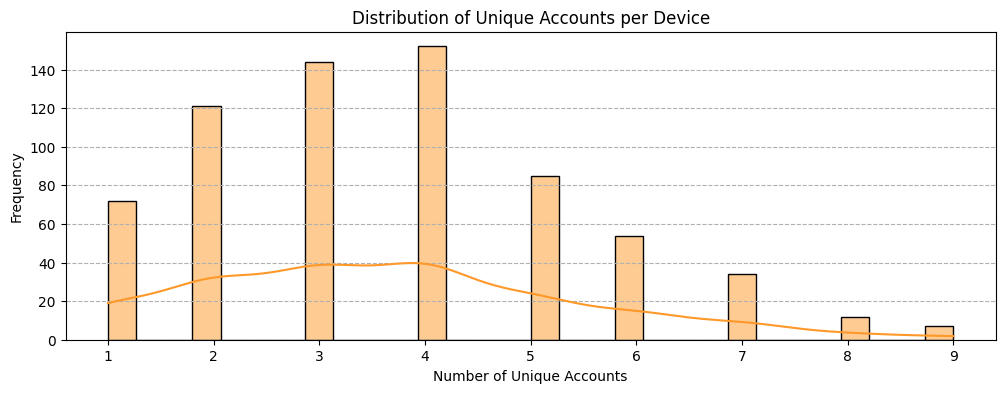

In [66]:
# Visualize the distribution
plt.figure(figsize=(12, 4))
sns.histplot(device_account_counts['UniqueAccounts'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unique Accounts per Device')
plt.xlabel('Number of Unique Accounts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [67]:
# Multiple Accounts Using the Same IP Address
ip_counts = df.groupby('IP Address')['AccountID'].nunique().reset_index()
ip_counts.columns = ['IP Address', 'UniqueAccounts']
shared_ips = ip_counts[ip_counts['UniqueAccounts'] > 1]
print(f"Number of IP addresses used by multiple accounts: {len(shared_ips)}")
display(shared_ips.head())

Number of IP addresses used by multiple accounts: 552


IP Address  UniqueAccounts
0   1.198.76.182               8
1   1.238.163.61               3
2      1.7.29.72               2
3    1.98.25.114               3
4  10.144.131.89               3

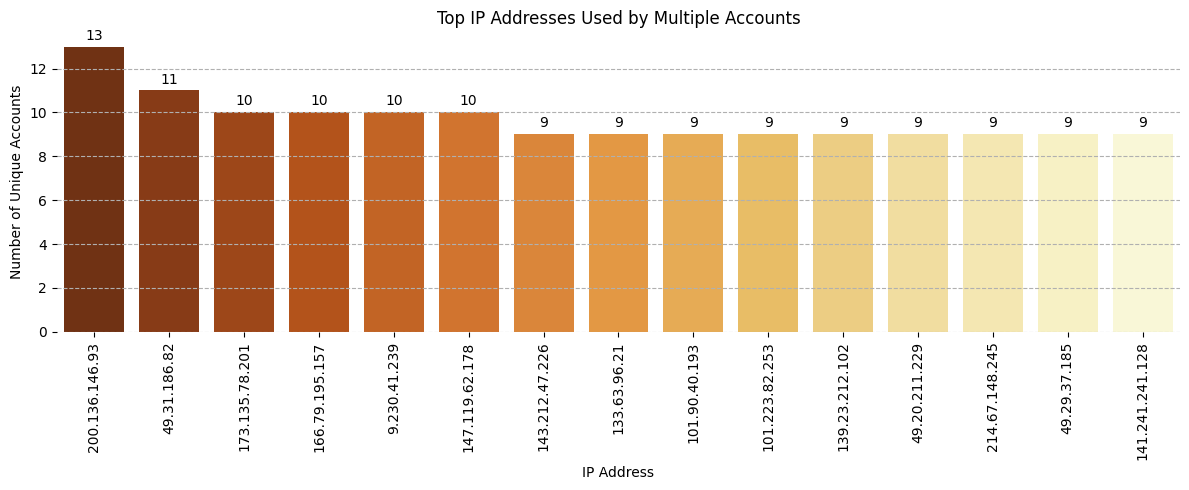

In [68]:
# Top IP addresses used by multiple accounts
plt.figure(figsize=(12, 5))
top_shared_ips = shared_ips.sort_values(by='UniqueAccounts', ascending=False).head(15)

ax = sns.barplot(x=top_shared_ips['IP Address'], y=top_shared_ips['UniqueAccounts'], palette='YlOrBr_r')
plt.title('Top IP Addresses Used by Multiple Accounts')
plt.xlabel('IP Address')
plt.ylabel('Number of Unique Accounts')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                color='black', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [69]:
# Frequent IP Changes for a Single Account
# Group by AccountID to count unique IP Addresses
ip_variability = df.groupby('AccountID')['IP Address'].nunique().reset_index().rename(columns={'IP Address': 'UniqueIPAddresses'})
# Identify accounts with a high number of unique IP Addresses
high_ip_variability_accounts = ip_variability[ip_variability['UniqueIPAddresses'] > 3]  # Example threshold
print(f"Number of accounts with high IP variability: {len(high_ip_variability_accounts)}")
display(high_ip_variability_accounts)

Number of accounts with high IP variability: 366


AccountID  UniqueIPAddresses
1     AC00002                  7
2     AC00003                  5
3     AC00004                  9
4     AC00005                  9
5     AC00006                  4
..        ...                ...
489   AC00495                  8
491   AC00497                  6
492   AC00498                  8
493   AC00499                  7
494   AC00500                  4

[366 rows x 2 columns]

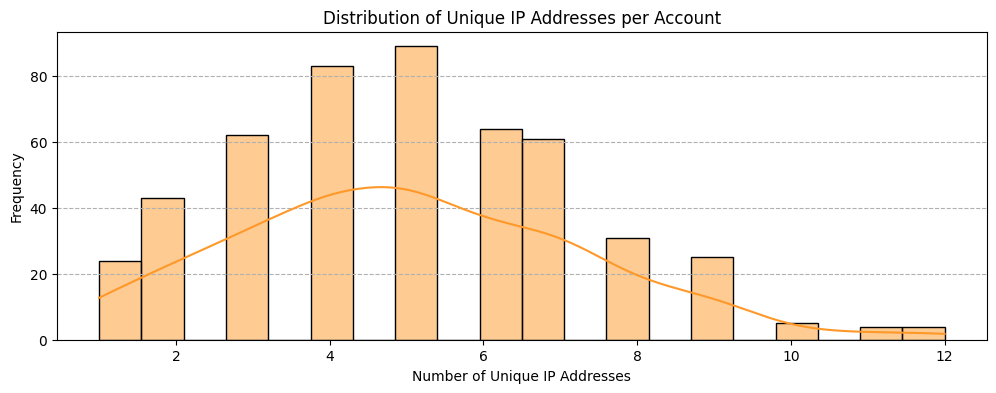

In [70]:
# Plot distribution of unique IP addresses per account
plt.figure(figsize=(12, 4))
sns.histplot(ip_variability['UniqueIPAddresses'], bins=20, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unique IP Addresses per Account')
plt.xlabel('Number of Unique IP Addresses')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [71]:
# Calculate summary statistics for TransactionDuration
duration_mean = df['TransactionDuration'].mean()
duration_std = df['TransactionDuration'].std()
long_duration_threshold = duration_mean + 2 * duration_std

# Identify long-duration transactions
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of long-duration transactions (above {long_duration_threshold} seconds): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

Number of long-duration transactions (above 259.5708259512189 seconds): 142


TransactionID AccountID  TransactionAmount     TransactionDate  \
7       TX000008   AC00069             171.42 2023-05-08 17:47:59   
25      TX000026   AC00041               7.49 2023-10-20 17:53:13   
29      TX000030   AC00313              56.17 2023-09-20 16:55:42   
51      TX000052   AC00482             424.56 2023-02-21 17:45:55   
73      TX000074   AC00110             233.92 2023-10-20 16:54:28   

   TransactionType      Location DeviceID       IP Address MerchantID Channel  \
7           Credit  Indianapolis  D000500    92.214.76.157       M020  Branch   
25          Credit       Houston  D000671   81.248.235.147       M043  Online   
29           Debit       Detroit  D000297     33.28.138.82       M043  Branch   
51           Debit         Omaha  D000598   179.43.245.131       M015  Online   
73          Credit  Jacksonville  D000295  152.140.239.181       M046  Online   

    ...  TransactionDuration LoginAttempts  AccountBalance  \
7   ...                  291             1         2796.24   
25  ...                  276             1         3634.67   
29  ...                  283             1         1351.69   
51  ...                  264             1         5183.85   
73  ...                  280             1         6537.62   

    PreviousTransactionDate  BalanceChange TransactionDayOfWeek  Day_of_Week  \
7       2024-11-04 08:10:55        2967.66               Monday       Monday   
25      2024-11-04 08:09:44        3642.16               Friday       Friday   
29      2024-11-04 08:08:30        1295.52            Wednesday    Wednesday   
51      2024-11-04 08:09:02        4759.29              Tuesday      Tuesday   
73      2024-11-04 08:08:45        6771.54               Friday       Friday   

   TransactionHour AverageTransactionAmount  UniqueLocationsCount  
7               17               231.082857                     6  
25              17               164.240000                     7  
29              16               247.900000                     3  
51              17               265.671667                     5  
73              16               313.471250                     8  

[5 rows x 22 columns]

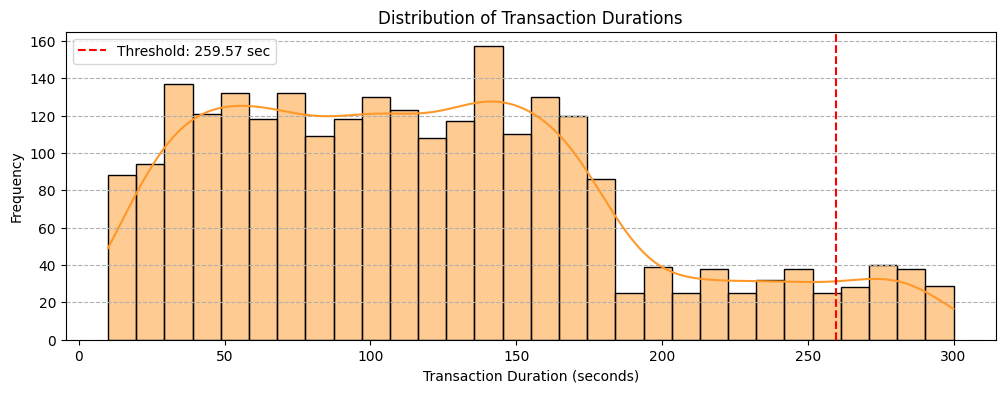

In [72]:
# Visualize distribution of TransactionDuration
plt.figure(figsize=(12, 4))
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])  # Color Palette
plt.axvline(long_duration_threshold, color='red', linestyle='--', label=f'Threshold: {long_duration_threshold:.2f} sec')
plt.title('Distribution of Transaction Durations')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


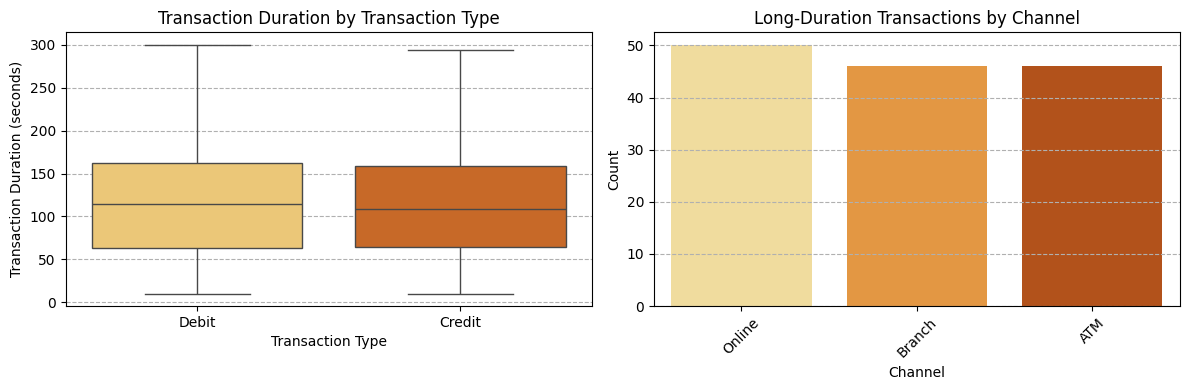

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot of Transaction Duration by Transaction Type
sns.boxplot(ax=axes[0], x='TransactionType', y='TransactionDuration', data=df, palette='YlOrBr')
axes[0].set_title('Transaction Duration by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Transaction Duration (seconds)')
axes[0].grid(axis='y', linestyle='--')

# Countplot of Long-Duration Transactions by Channel
channel_order = long_duration_transactions['Channel'].value_counts().index
sns.countplot(ax=axes[1], data=long_duration_transactions, x='Channel', order=channel_order, palette='YlOrBr')
axes[1].set_title('Long-Duration Transactions by Channel')
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


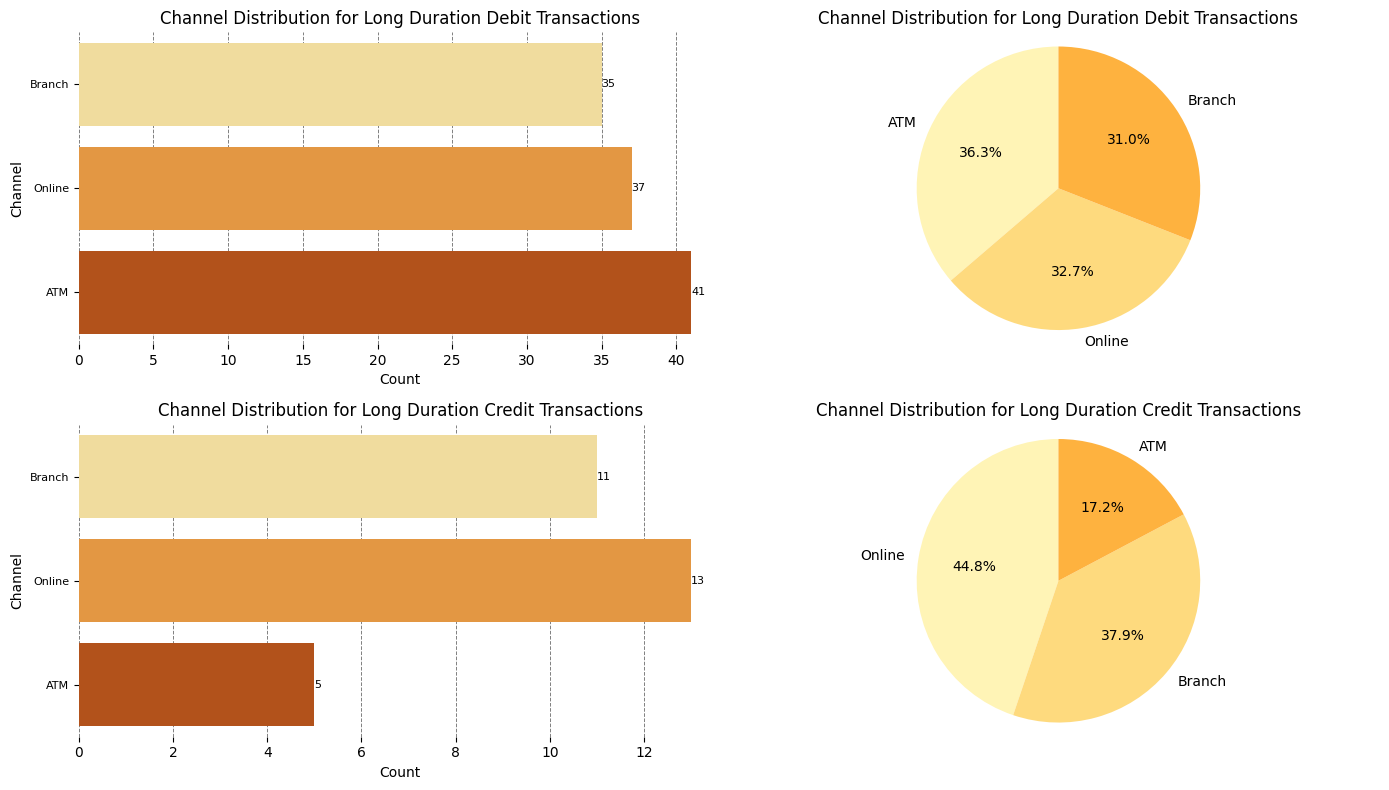

In [74]:
def plot_long_duration_channel_visualization(ax, df, transaction_type):
    """Plots channel distribution for long duration transactions of a given transaction type using countplot and pie chart."""

    filtered_data = df[(df['TransactionType'] == transaction_type) & (df['TransactionDuration'] > df['TransactionDuration'].mean() + 2 * df['TransactionDuration'].std())]
    sns.countplot(y='Channel', data=filtered_data, ax=ax[0], palette='YlOrBr')
    ax[0].set_title(f'Channel Distribution for Long Duration {transaction_type} Transactions')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Channel')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=8)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    channel_counts = filtered_data['Channel'].value_counts()
    ax[1].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr'))
    ax[1].set_title(f'Channel Distribution for Long Duration {transaction_type} Transactions')
    ax[1].axis('equal')

unique_transaction_types = df['TransactionType'].unique()
num_transaction_types = len(unique_transaction_types)

fig, axes = plt.subplots(num_transaction_types, 2, figsize=(14, 4 * num_transaction_types))

for i, transaction_type in enumerate(unique_transaction_types):
    plot_long_duration_channel_visualization(axes[i], df, transaction_type)

plt.tight_layout()
plt.show()

In [75]:
# Identify transactions with unusually long durations
long_duration_threshold = df['TransactionDuration'].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

Number of transactions with long duration (top 5%): 123


TransactionID AccountID  TransactionAmount     TransactionDate  \
7        TX000008   AC00069             171.42 2023-05-08 17:47:59   
25       TX000026   AC00041               7.49 2023-10-20 17:53:13   
29       TX000030   AC00313              56.17 2023-09-20 16:55:42   
73       TX000074   AC00110             233.92 2023-10-20 16:54:28   
113      TX000114   AC00121             213.76 2023-03-01 17:52:14   

    TransactionType      Location DeviceID       IP Address MerchantID  \
7            Credit  Indianapolis  D000500    92.214.76.157       M020   
25           Credit       Houston  D000671   81.248.235.147       M043   
29            Debit       Detroit  D000297     33.28.138.82       M043   
73           Credit  Jacksonville  D000295  152.140.239.181       M046   
113          Credit        Dallas  D000574   51.250.122.123       M009   

    Channel  ...  TransactionDuration LoginAttempts  AccountBalance  \
7    Branch  ...                  291             1         2796.24   
25   Online  ...                  276             1         3634.67   
29   Branch  ...                  283             1         1351.69   
73   Online  ...                  280             1         6537.62   
113     ATM  ...                  282             1         3528.72   

     PreviousTransactionDate  BalanceChange TransactionDayOfWeek  Day_of_Week  \
7        2024-11-04 08:10:55        2967.66               Monday       Monday   
25       2024-11-04 08:09:44        3642.16               Friday       Friday   
29       2024-11-04 08:08:30        1295.52            Wednesday    Wednesday   
73       2024-11-04 08:08:45        6771.54               Friday       Friday   
113      2024-11-04 08:09:36        3742.48            Wednesday    Wednesday   

    TransactionHour AverageTransactionAmount  UniqueLocationsCount  
7                17               231.082857                     6  
25               17               164.240000                     7  
29               16               247.900000                     3  
73               16               313.471250                     8  
113              17               147.365000                     2  

[5 rows x 22 columns]

Number of transactions with long duration (top 5%): 123


TransactionID AccountID  TransactionAmount     TransactionDate  \
7        TX000008   AC00069             171.42 2023-05-08 17:47:59   
25       TX000026   AC00041               7.49 2023-10-20 17:53:13   
29       TX000030   AC00313              56.17 2023-09-20 16:55:42   
73       TX000074   AC00110             233.92 2023-10-20 16:54:28   
113      TX000114   AC00121             213.76 2023-03-01 17:52:14   

    TransactionType      Location DeviceID       IP Address MerchantID  \
7            Credit  Indianapolis  D000500    92.214.76.157       M020   
25           Credit       Houston  D000671   81.248.235.147       M043   
29            Debit       Detroit  D000297     33.28.138.82       M043   
73           Credit  Jacksonville  D000295  152.140.239.181       M046   
113          Credit        Dallas  D000574   51.250.122.123       M009   

    Channel  ...  TransactionDuration LoginAttempts  AccountBalance  \
7    Branch  ...                  291             1         2796.24   
25   Online  ...                  276             1         3634.67   
29   Branch  ...                  283             1         1351.69   
73   Online  ...                  280             1         6537.62   
113     ATM  ...                  282             1         3528.72   

     PreviousTransactionDate  BalanceChange TransactionDayOfWeek  Day_of_Week  \
7        2024-11-04 08:10:55        2967.66               Monday       Monday   
25       2024-11-04 08:09:44        3642.16               Friday       Friday   
29       2024-11-04 08:08:30        1295.52            Wednesday    Wednesday   
73       2024-11-04 08:08:45        6771.54               Friday       Friday   
113      2024-11-04 08:09:36        3742.48            Wednesday    Wednesday   

    TransactionHour AverageTransactionAmount  UniqueLocationsCount  
7                17               231.082857                     6  
25               17               164.240000                     7  
29               16               247.900000                     3  
73               16               313.471250                     8  
113              17               147.365000                     2  

[5 rows x 22 columns]

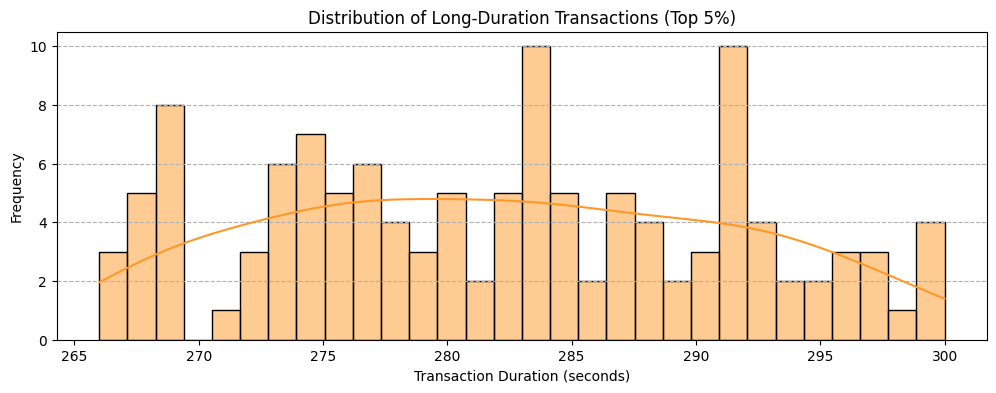

In [76]:
# Identify transactions with unusually long durations
long_duration_threshold = df['TransactionDuration'].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

# Plot distribution of long-duration transactions
plt.figure(figsize=(12, 4))
sns.histplot(long_duration_transactions['TransactionDuration'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Long-Duration Transactions (Top 5%)')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [77]:
# Select features for clustering
features = ['TransactionAmount', 'TransactionDuration']
X = df[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

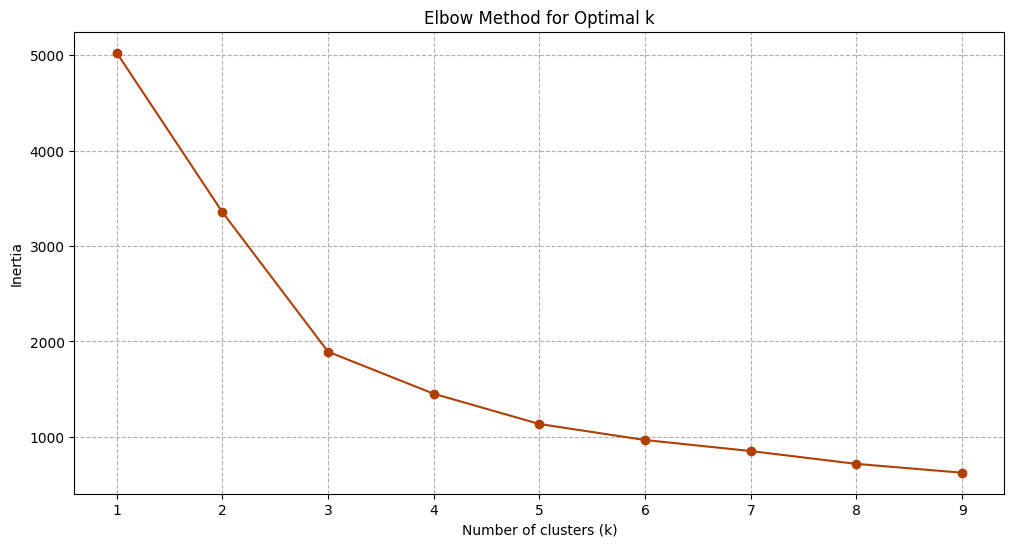

In [78]:
# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o', linestyle='-', color=sns.color_palette("YlOrBr", 10)[8])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--')
plt.show()

In [79]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Assign clusters and calculate distance to cluster centroid
df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


TransactionID AccountID  TransactionAmount     TransactionDate  \
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
141       TX000142   AC00114            1049.92 2023-10-23 16:50:33   
142       TX000143   AC00163             227.14 2023-07-03 17:42:08   
146       TX000147   AC00385             973.39 2023-08-30 17:23:20   
...            ...       ...                ...                 ...   
2403      TX002404   AC00111            1493.00 2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33 2023-09-25 17:11:19   
2439      TX002440   AC00439             538.17 2023-09-26 17:27:17   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   
2458      TX002459   AC00312             430.83 2023-08-14 16:09:21   

     TransactionType          Location DeviceID       IP Address MerchantID  \
74             Debit      Indianapolis  D000231     193.83.0.183       M036   
85            Credit            Austin  D000574   165.114.224.47       M012   
141            Debit           Detroit  D000522    121.67.144.20       M052   
142            Debit         Charlotte  D000439   197.162.55.147       M057   
146            Debit        Sacramento  D000292   202.194.199.70       M026   
...              ...               ...      ...              ...        ...   
2403           Debit  Colorado Springs  D000344  136.162.111.135       M096   
2414           Debit       San Antonio  D000072  116.106.207.139       M064   
2439          Credit        Washington  D000430    116.44.12.250       M055   
2445           Debit        Washington  D000677    223.32.70.156       M029   
2458           Debit       Los Angeles  D000195      87.50.72.69       M079   

     Channel  ...  AccountBalance PreviousTransactionDate  BalanceChange  \
74    Branch  ...          605.95     2024-11-04 08:06:51        -606.56   
85    Online  ...         8654.28     2024-11-04 08:06:53        9994.47   
141      ATM  ...         2037.85     2024-11-04 08:10:34         987.93   
142      ATM  ...          341.94     2024-11-04 08:11:34         114.80   
146   Branch  ...         2042.22     2024-11-04 08:11:44        1068.83   
...      ...  ...             ...                     ...            ...   
2403     ATM  ...         1619.16     2024-11-04 08:07:07         126.16   
2414  Branch  ...         1588.31     2024-11-04 08:07:07         -76.02   
2439  Branch  ...         5908.04     2024-11-04 08:10:25        6446.21   
2445  Online  ...        10513.52     2024-11-04 08:09:32       10110.51   
2458  Branch  ...          941.49     2024-11-04 08:07:49         510.66   

      TransactionDayOfWeek  Day_of_Week TransactionHour  \
74               Wednesday    Wednesday              16   
85                  Friday       Friday              17   
141                 Monday       Monday              16   
142                 Monday       Monday              17   
146              Wednesday    Wednesday              17   
...                    ...          ...             ...   
2403             Wednesday    Wednesday              17   
2414                Monday       Monday              17   
2439               Tuesday      Tuesday              17   
2445                Monday       Monday              17   
2458                Monday       Monday              16   

      AverageTransactionAmount UniqueLocationsCount Cluster  \
74                  439.288889                    9       0   
85                  642.514000                    5       0   
141                 317.322857                    7       0   
142                 307.955000                    2       2   
146                 591.600000                    7       0   
...                        ...                  ...     ...   
2403                438.818571                    6       0   
2414                723.390000                    3       0   
2439          

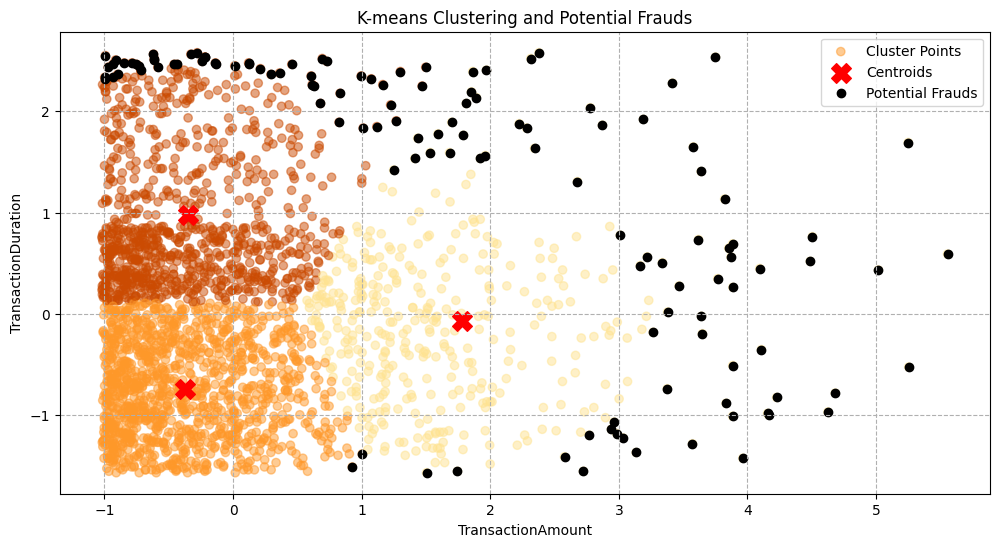

In [80]:
# Visualize clusters and potential frauds (2D plot for simplicity with legend)
plt.figure(figsize=(12, 6))

cluster_colors = sns.color_palette("YlOrBr", n_colors=len(np.unique(kmeans.labels_)))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[cluster_colors[i] for i in kmeans.labels_], alpha=0.5, label='Cluster Points')
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

frauds = plt.scatter(X_scaled[potential_frauds.index, 0], X_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.show()

In [81]:
# Map the cluster labels to descriptive names
label_mapping = {
    -1: 'Fraud (Outliers)',
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4',
}

# Select relevant features for DBSCAN
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X = df[features].copy()

X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

df['DBSCAN_Cluster'] = dbscan.labels_

# Map cluster labels to descriptive names
df['Cluster_Description'] = df['DBSCAN_Cluster'].map(label_mapping)

# Identify outliers (noise points) labeled as -1
potential_frauds = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected by DBSCAN: 17


TransactionID AccountID  TransactionAmount     TransactionDate  \
274      TX000275   AC00454            1176.28 2023-12-20 16:08:02   
454      TX000455   AC00264             611.11 2023-10-18 18:32:31   
653      TX000654   AC00423            1919.11 2023-06-27 17:48:25   
693      TX000694   AC00011             733.29 2023-03-15 18:42:16   
754      TX000755   AC00153              84.34 2023-06-08 16:27:56   

    TransactionType        Location DeviceID       IP Address MerchantID  \
274          Credit     Kansas City  D000476      50.202.8.53       M074   
454           Debit         Detroit  D000215   141.201.46.191       M045   
653           Debit        Portland  D000191  207.157.126.125       M033   
693           Debit  Virginia Beach  D000618    16.51.235.240       M032   
754           Debit         Memphis  D000493   200.136.146.93       M039   

    Channel  ...  BalanceChange TransactionDayOfWeek  Day_of_Week  \
274     ATM  ...        1499.97            Wednesday    Wednesday   
454     ATM  ...         308.73            Wednesday    Wednesday   
653     ATM  ...        9171.13              Tuesday      Tuesday   
693     ATM  ...        9693.71            Wednesday    Wednesday   
754  Online  ...        5229.63             Thursday     Thursday   

     TransactionHour  AverageTransactionAmount UniqueLocationsCount  Cluster  \
274               16                494.182500                    4        0   
454               18                441.255000                    6        2   
653               17                506.356667                    5        0   
693               18                348.322857                    5        0   
754               16                350.270000                    7        2   

    DistanceToCentroid DBSCAN_Cluster  Cluster_Description  
274           1.488559             -1     Fraud (Outliers)  
454           1.959599             -1     Fraud (Outliers)  
653           3.828962             -1     Fraud (Outliers)  
693           0.418493             -1     Fraud (Outliers)  
754           0.940290             -1     Fraud (Outliers)  

[5 rows x 26 columns]

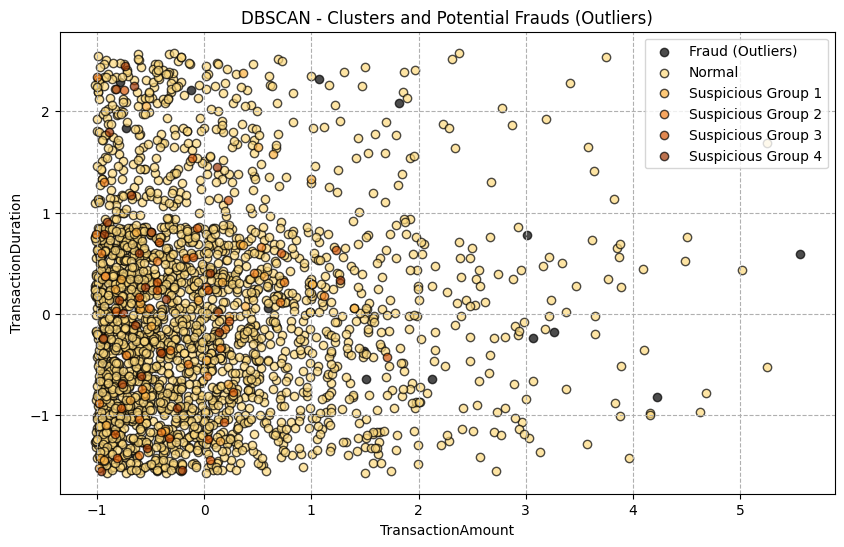

In [82]:
# Visualize clusters and potential frauds
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)

cluster_colors = sns.color_palette("YlOrBr", n_colors=len(unique_labels))

colors = []
for i, k in enumerate(unique_labels):
    if k == -1:
        colors.append([0, 0, 0, 1])  # Black for noise
    else:
        colors.append(cluster_colors[i % len(cluster_colors)])

for k, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.title('DBSCAN - Clusters and Potential Frauds (Outliers)')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[1])  # TransactionDuration
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [83]:
# Define outlier mapping
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}

# Select relevant features for fraud detection
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']  # Modify as needed
X = df[features].copy()

X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies
df['AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IsAnomaly'] = iso_forest.predict(X_scaled)

# Map results to descriptive labels
df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)

# Filter out detected anomalies
potential_frauds = df[df['IsAnomaly'] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected: 126


TransactionID AccountID  TransactionAmount     TransactionDate  \
26       TX000027   AC00441             246.93 2023-04-17 16:37:01   
32       TX000033   AC00060             396.45 2023-09-25 16:26:00   
85       TX000086   AC00098            1340.19 2023-09-29 17:22:10   
91       TX000092   AC00310             223.85 2023-10-02 16:36:10   
146      TX000147   AC00385             973.39 2023-08-30 17:23:20   

    TransactionType     Location DeviceID       IP Address MerchantID Channel  \
26            Debit        Miami  D000046   55.154.161.250       M029     ATM   
32            Debit     New York  D000621   133.67.250.163       M007     ATM   
85           Credit       Austin  D000574   165.114.224.47       M012  Online   
91            Debit  Kansas City  D000481  133.223.159.151       M009     ATM   
146           Debit   Sacramento  D000292   202.194.199.70       M026  Branch   

     ...  TransactionHour AverageTransactionAmount  UniqueLocationsCount  \
26   ...               16               317.948333                     6   
32   ...               16               388.180000                     4   
85   ...               17               642.514000                     5   
91   ...               16               439.977143                     7   
146  ...               17               591.600000                     7   

     Cluster  DistanceToCentroid DBSCAN_Cluster  Cluster_Description  \
26         2            0.461840              2   Suspicious Group 2   
32         2            0.744993              1   Suspicious Group 1   
85         0            2.163279              0               Normal   
91         1            0.221557              4   Suspicious Group 4   
146        0            2.640557              0               Normal   

    AnomalyScore IsAnomaly     AnomalyLabel  
26     -0.075150        -1  Potential Fraud  
32     -0.014181        -1  Potential Fraud  
85     -0.018206        -1  Potential Fraud  
91     -0.029888        -1  Potential Fraud  
146    -0.016904        -1  Potential Fraud  

[5 rows x 29 columns]

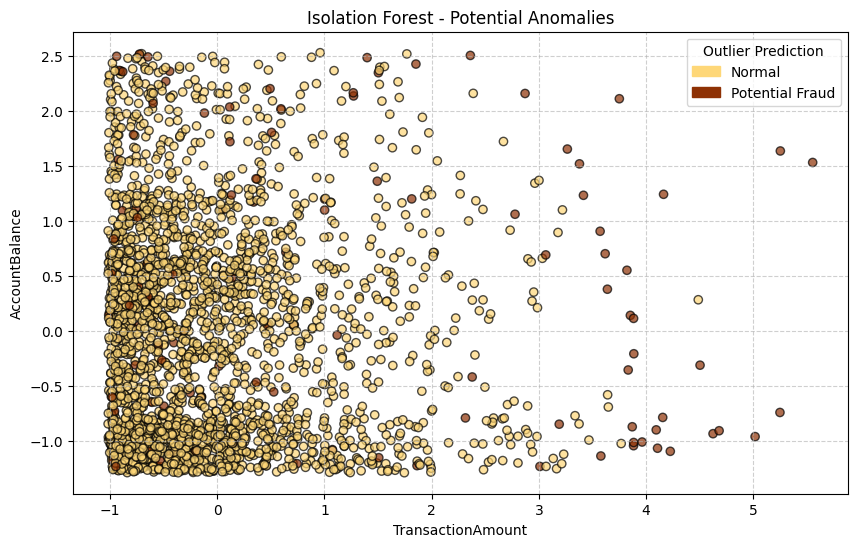

In [84]:
cmap = plt.get_cmap('YlOrBr')
colors = np.array([cmap(0.9) if anomaly == -1 else cmap(0.3) for anomaly in df['IsAnomaly']])

# Visualize potential frauds (TransactionAmount vs AccountBalance)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_scaled[:, 0],  # TransactionAmount
    X_scaled[:, 2],  # AccountBalance
    c=colors,
    alpha=0.7,
    edgecolors='k',
    label='Data Points'
)

normal_patch = mpatches.Patch(color=cmap(0.3), label='Normal')
fraud_patch = mpatches.Patch(color=cmap(0.9), label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')

plt.title('Isolation Forest - Potential Anomalies')
plt.xlabel(features[0])
plt.ylabel(features[2])

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [85]:
# Define features
FEATURES = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance',
    'LoginAttempts'
]

X = df[FEATURES].copy()

# Handle missing values
X = X.fillna(X.mean())


In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
dump(scaler, "scaler.joblib")


['scaler.joblib']

In [87]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

iso_forest.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [88]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

iso_forest.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [89]:
df['IF_AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IF_Label'] = iso_forest.predict(X_scaled)

# Map labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
df['IF_Label_Desc'] = df['IF_Label'].map(outlier_mapping)


In [90]:
anomaly_rate = (df['IF_Label'] == -1).mean() * 100
print(f"Isolation Forest anomaly rate: {anomaly_rate:.2f}%")


Isolation Forest anomaly rate: 5.02%


In [91]:
plt.hist(df['IF_AnomalyScore'], bins=50)
plt.xlabel("Isolation Forest Anomaly Score")
plt.ylabel("Frequency")
plt.title("Isolation Forest Score Distribution")
plt.show()


In [92]:
dump(iso_forest, "isolation_forest.joblib")


['isolation_forest.joblib']

In [93]:
oc_svm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    nu=0.05   # expected anomaly proportion
)

oc_svm.fit(X_scaled)


OneClassSVM(nu=0.05)

In [94]:
df['SVM_Label'] = oc_svm.predict(X_scaled)
df['SVM_Label_Desc'] = df['SVM_Label'].map(outlier_mapping)


In [95]:
df['HighConfidenceFraud'] = np.where(
    (df['IF_Label'] == -1) & (df['SVM_Label'] == -1),
    'Yes',
    'No'
)
df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   Cluster_Description AnomalyScore  IsAnomaly  AnomalyLabel  IF_AnomalyScore  \
0               Normal     0.184358          1        Normal         0.184358   
1               Normal     0.097301          1        Normal         0.097301   
2               Normal     0.178514          1        Normal         0.178514   
3               Normal     0.150973          1        Normal         0.150973   
4               Normal     0.142493          1        Normal         0.142493   

  IF_Label  IF_Label_Desc SVM_Label SVM_Label_Desc  HighConfidenceFraud  
0        1         Normal         1         Normal                   No  
1        1         Normal         1         Normal                   No  
2        1         Normal         1         Normal                   No  
3        1         Normal         1         Normal                   No  
4        1         Normal         1         Normal                   No  

[5 rows x 35 columns]

In [96]:
high_conf_frauds = df[df['HighConfidenceFraud'] == 'Yes']

print(f"High-confidence fraud cases: {len(high_conf_frauds)}")
display(high_conf_frauds.head())


High-confidence fraud cases: 82


TransactionID AccountID  TransactionAmount     TransactionDate  \
26       TX000027   AC00441             246.93 2023-04-17 16:37:01   
85       TX000086   AC00098            1340.19 2023-09-29 17:22:10   
146      TX000147   AC00385             973.39 2023-08-30 17:23:20   
147      TX000148   AC00161             514.95 2023-04-13 18:37:48   
231      TX000232   AC00430             705.60 2023-02-20 18:41:43   

    TransactionType    Location DeviceID      IP Address MerchantID Channel  \
26            Debit       Miami  D000046  55.154.161.250       M029     ATM   
85           Credit      Austin  D000574  165.114.224.47       M012  Online   
146           Debit  Sacramento  D000292  202.194.199.70       M026  Branch   
147           Debit    New York  D000109    23.92.205.75       M056  Online   
231           Debit     Phoenix  D000103   205.45.234.42       M071  Branch   

     ...  Cluster_Description AnomalyScore  IsAnomaly     AnomalyLabel  \
26   ...   Suspicious Group 2    -0.075150         -1  Potential Fraud   
85   ...               Normal    -0.018206         -1  Potential Fraud   
146  ...               Normal    -0.016904         -1  Potential Fraud   
147  ...   Suspicious Group 2    -0.086068         -1  Potential Fraud   
231  ...   Suspicious Group 1    -0.072636         -1  Potential Fraud   

     IF_AnomalyScore IF_Label    IF_Label_Desc SVM_Label   SVM_Label_Desc  \
26         -0.075150       -1  Potential Fraud        -1  Potential Fraud   
85         -0.018206       -1  Potential Fraud        -1  Potential Fraud   
146        -0.016904       -1  Potential Fraud        -1  Potential Fraud   
147        -0.086068       -1  Potential Fraud        -1  Potential Fraud   
231        -0.072636       -1  Potential Fraud        -1  Potential Fraud   

     HighConfidenceFraud  
26                   Yes  
85                   Yes  
146                  Yes  
147                  Yes  
231                  Yes  

[5 rows x 35 columns]

In [97]:
dump(oc_svm, "one_class_svm.joblib")

['one_class_svm.joblib']

In [98]:
# Define thresholds using percentiles
low_threshold = df['IF_AnomalyScore'].quantile(0.10)
high_threshold = df['IF_AnomalyScore'].quantile(0.03)

def risk_level(score):
    if score <= high_threshold:
        return 'High Risk'
    elif score <= low_threshold:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['RiskLevel'] = df['IF_AnomalyScore'].apply(risk_level)


In [99]:
df['FinalFraudDecision'] = np.where(
    (df['RiskLevel'] == 'High Risk') & (df['HighConfidenceFraud'] == 'Yes'),
    'Flag Immediately',
    'Monitor'
)
df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   IsAnomaly AnomalyLabel  IF_AnomalyScore  IF_Label  IF_Label_Desc SVM_Label  \
0          1       Normal         0.184358         1         Normal         1   
1          1       Normal         0.097301         1         Normal         1   
2          1       Normal         0.178514         1         Normal         1   
3          1       Normal         0.150973         1         Normal         1   
4          1       Normal         0.142493         1         Normal         1   

   SVM_Label_Desc HighConfidenceFraud RiskLevel  FinalFraudDecision  
0          Normal                  No  Low Risk             Monitor  
1          Normal                  No  Low Risk             Monitor  
2          Normal                  No  Low Risk             Monitor  
3          Normal                  No  Low Risk             Monitor  
4          Normal                  No  Low Risk             Monitor  

[5 rows x 37 columns]

In [100]:
comparison = pd.crosstab(
    df['IF_Label_Desc'],
    df['SVM_Label_Desc'],
    rownames=['Isolation Forest'],
    colnames=['One-Class SVM']
)

display(comparison)
df.head
df.head()

One-Class SVM     Normal  Potential Fraud
Isolation Forest                         
Normal              2340               46
Potential Fraud       44               82

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   IsAnomaly AnomalyLabel  IF_AnomalyScore  IF_Label  IF_Label_Desc SVM_Label  \
0          1       Normal         0.184358         1         Normal         1   
1          1       Normal         0.097301         1         Normal         1   
2          1       Normal         0.178514         1         Normal         1   
3          1       Normal         0.150973         1         Normal         1   
4          1       Normal         0.142493         1         Normal         1   

   SVM_Label_Desc HighConfidenceFraud RiskLevel  FinalFraudDecision  
0          Normal                  No  Low Risk             Monitor  
1          Normal                  No  Low Risk             Monitor  
2          Normal                  No  Low Risk             Monitor  
3          Normal                  No  Low Risk             Monitor  
4          Normal                  No  Low Risk             Monitor  

[5 rows x 37 columns]

In [101]:
df.groupby('RiskLevel')[FEATURES].mean()

TransactionAmount  TransactionDuration  AccountBalance  \
RiskLevel                                                             
High Risk           426.743421           151.223684     6290.082632   
Low Risk            262.701681           117.189381     4937.903217   
Medium Risk         689.870852           137.517045     6871.713068   

             LoginAttempts  
RiskLevel                   
High Risk         3.907895  
Low Risk          1.002212  
Medium Risk       1.494318

In [102]:
final_output = df[
    FEATURES + [
        'IF_AnomalyScore',
        'RiskLevel',
        'HighConfidenceFraud',
        'FinalFraudDecision'
    ]
]

display(final_output.head(15))

TransactionAmount  TransactionDuration  AccountBalance  LoginAttempts  \
0               14.09                   81         5112.21              1   
1              376.24                  141        13758.91              1   
2              126.29                   56         1122.35              1   
3              184.50                   25         8569.06              1   
4               13.45                  198         7429.40              1   
5               92.15                  172          781.68              1   
6                7.08                  139        13316.71              1   
7              171.42                  291         2796.24              1   
8              106.23                   86         9095.14              1   
9              815.96                  120         1021.88              1   
10              17.78                   59         7599.52              1   
11             190.02                  173         1528.81              1   
12             494.52                  111         1620.02              1   
13             781.76                  123          189.69              1   
14             166.99                  134          299.93              1   

    IF_AnomalyScore RiskLevel HighConfidenceFraud FinalFraudDecision  
0          0.184358  Low Risk                  No            Monitor  
1          0.097301  Low Risk                  No            Monitor  
2          0.178514  Low Risk                  No            Monitor  
3          0.150973  Low Risk                  No            Monitor  
4          0.142493  Low Risk                  No            Monitor  
5          0.170937  Low Risk                  No            Monitor  
6          0.091136  Low Risk                  No            Monitor  
7          0.076683  Low Risk                  No            Monitor  
8          0.177712  Low Risk                  No            Monitor  
9          0.133037  Low Risk                  No            Monitor  
10         0.172040  Low Risk                  No            Monitor  
11         0.174498  Low Risk                  No            Monitor  
12         0.165529  Low Risk                  No            Monitor  
13         0.107155  Low Risk                  No            Monitor  
14         0.168789  Low Risk                  No            Monitor

In [103]:
df['AmountBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)
df['LoginIntensity'] = df['LoginAttempts'] / (df['TransactionDuration'] + 1)
df['TransactionSpeed'] = df['TransactionAmount'] / (df['TransactionDuration'] + 1)


In [104]:
df['AmountZScore'] = (
    (df['TransactionAmount'] - df['TransactionAmount'].mean()) /
    df['TransactionAmount'].std()
)

In [105]:
df['HighLoginAttempts'] = (df['LoginAttempts'] > df['LoginAttempts'].quantile(0.95)).astype(int)
df['LargeTransaction'] = (df['TransactionAmount'] > df['TransactionAmount'].quantile(0.95)).astype(int)


In [106]:
FEATURES = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance',
    'LoginAttempts',
    'AmountBalanceRatio',
    'AmountZScore',
    'HighLoginAttempts',
    'LargeTransaction'
]
df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   SVM_Label_Desc HighConfidenceFraud  RiskLevel  FinalFraudDecision  \
0          Normal                  No   Low Risk             Monitor   
1          Normal                  No   Low Risk             Monitor   
2          Normal                  No   Low Risk             Monitor   
3          Normal                  No   Low Risk             Monitor   
4          Normal                  No   Low Risk             Monitor   

   AmountBalanceRatio LoginIntensity  TransactionSpeed AmountZScore  \
0            0.002756       0.012195          0.171829    -0.971082   
1            0.027343       0.007042          2.649577     0.269386   
2            0.112423       0.017544          2.215614    -0.586765   
3            0.021528       0.038462          7.096154    -0.387379   
4            0.001810       0.005025          0.067588    -0.973274   

  HighLoginAttempts  LargeTransaction  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 43 columns]

In [107]:
X = df[FEATURES].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest.fit(X_scaled)
df['IF_Label'] = iso_forest.predict(X_scaled)

oc_svm.fit(X_scaled)
df['SVM_Label'] = oc_svm.predict(X_scaled)


In [108]:
df.groupby('RiskLevel')[FEATURES].mean()

TransactionAmount  TransactionDuration  AccountBalance  \
RiskLevel                                                             
High Risk           426.743421           151.223684     6290.082632   
Low Risk            262.701681           117.189381     4937.903217   
Medium Risk         689.870852           137.517045     6871.713068   

             LoginAttempts  AmountBalanceRatio  AmountZScore  \
RiskLevel                                                      
High Risk         3.907895            0.224967      0.442375   
Low Risk          1.002212            0.175157     -0.119515   
Medium Risk       1.494318            0.500856      1.343662   

             HighLoginAttempts  LargeTransaction  
RiskLevel                                         
High Risk             0.881579          0.144737  
Low Risk              0.002212          0.021681  
Medium Risk           0.284091          0.375000